# Lead Scoring  Case Study

## Problem Statement

An education company named X Education sells online courses to industry professionals. Company need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. Current lead conversion rate at X education is around 30%. <br>

## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


### Steps that we will follows in this case study, as follows

1. Reading, Understanding and Visualizing Data
2. Preparing the data for modeling (Train- Test split, Rescaling )
3. Training the Model
4. Finding Optimal Cut-off Probability
5. Predictions and Evaluation Test Data

In [1]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries for Analysis:-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Set_option to avoid truncation of columns and rows:-

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 1. Loading , Undestanding and Visualizing the Data


### 1.1 Loading Dataset

In [4]:
# Importing data
lead_df = pd.read_csv('D:\ds\Main Course\Lead Score Case Study\Lead Scoring Assignment\\Leads.csv')


### 1.2 Inspect & Analyze dataset

In [4]:
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [5]:
lead_df.tail()

Prospect ID  Lead Number  \
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  ... Get updates on DM Content    Lead Profile  \
9235                  2.67  ...                        No  Potential Lead   
9236                  2.00  ...                        No  Potential Lead   
9237                  2.00  ...                        No  Potential Lead   
9238                  3.00  ...                        No             NaN   
9239                  3.00  ...                        No  Potential Lead   

                    City Asymmetrique Activity Index  \
9235              Mumbai                   02.Medium   
9236              Mumbai                   02.Medium   
9237              Mumbai                   02.Medium   
9238  Other Metro Cities                   02.Medium   
9239        Other Cities                   02.Medium   

     Asymmetrique Profile Index Asymmetrique Activity Score  \
9235                    01.High                        15.0   
9236                    01.High                        14.0   
9237                    01.High                        13.0   
9238                  02.Medium                        15.0   
9239                    01.High                        15.0   

     Asymmetrique Profile Score I agree to pay the amount through cheque  \
9235                       17.0                                       No   
9236                       19.0                                       No   
9237                       20.0                                       No   
9238                       16.0                                       No   
9239                       18.0                                       No   

     A free copy of Mastering The Interview Last Notable Activity  
9235                                     No     Email Marked Spam  
9236                                    Yes              SMS Sent  
9237                                    Yes              SMS Sent  
9238                                     No              SMS Sent  
9239                                    Yes              Modified  

[5 rows x 37 columns]

In [5]:
lead_df.shape

(9240, 37)

#### Dataset having 9240 rows and 37 columns

In [8]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
lead_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

### Insights

- From above statistical summary shows that column <b>'TotalVisits','Total Time Spent on Website','Page Views Per Visit'</b> having outliers ,cause there is significant difference between min and max values.We will verify it later in our further analysis of dataset.

### 1.3 Data Cleaning

In [6]:
# Checking datatype of columns:-

lead_df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

- Total 7 numeric columns and 30 categorical columns in the dataset

In [6]:
#Duplicate Check

lead_df.drop_duplicates().shape  # No duplicate rows

(9240, 37)

- Since the shape before and after dropping duplicate is same hence it seems no duplicate values in the dataset.

In [8]:
lead_df.columns.values

array(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype=object)

#### Note: There are some categorical variables have a level called 'Select' that needs to handle.


#### Finding which columns having level 'Select'

In [7]:
# Finding column names in which 'Select' level is available:-

df_cols = lead_df.columns.values

for i in df_cols:
    
    if any('SELECT' in str(val).upper() for val in lead_df[i].values):
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


#### Observation
We found that column <b>'Specialization','How did you hear about X Education','Lead Profile' and 'City'</b> having <b>'Select'</b> level.Which means the customer had not selected option while filling form.So it should be treat as 'Null' values.

In [12]:
lead_df['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [7]:
lead_df['Specialization'].isnull().sum()

1438

In [8]:
lead_df[lead_df['Specialization'].isna()]

Prospect ID  Lead Number              Lead Origin     Lead Source Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity        Country Specialization How did you hear about X Education What is your current occupation What matters most to you in choosing a course Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Receive More Updates About Our Courses Tags Lead Quality Update me on Supply Chain Content Get updates on DM Content Lead Profile City Asymmetrique Activity Index Asymmetrique Profile Index  Asymmetrique Activity Score  Asymmetrique Profile Score I agree to pay the amount through cheque A free copy of Mastering The Interview Last Notable Activity
5     2058ef08-2858-443e-a01f-a9237db2f5ce       660680                      API      Olark Chat           No          No          0          0.0                            0                   0.0  Olark Chat Conversation            NaN            NaN                                NaN                             NaN                                           NaN     No       No                No                 No        No                    No                      No                                     No  NaN          NaN                                No                        No          NaN  NaN                     01.High                  02.Medium                         17.0                        15.0                                       No                                     No              Modified
7     20ef72a2-fb3b-45e0-924e-551c5fa59095       660664                      API      Olark Chat           No          No          0          0.0                            0                   0.0  Olark Chat Conversation            NaN            NaN                                NaN                             NaN                                           NaN     No       No                No                 No        No                    No                      No                                     No  NaN          NaN                                No                        No          NaN  NaN                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No              Modified
16    3abb7c77-1634-4083-9a9f-861068220611       660540                      API      Olark Chat           No          No          0          0.0                            0                   0.0  Olark Chat Conversation            NaN            NaN                                NaN                             NaN                                           NaN     No       No                No                 No        No                    No                      No                                     No  NaN          NaN                                No                        No          NaN  NaN                     01.High                  02.Medium                         17.0                        15.0                                       No                                     No              Modified
33    5af0914a-fa65-48e1-b11e-b44849206dc3       660339                      API  Organic Search           No          No          0          3.0                           74                   1.5             Email Opened          India            NaN                                NaN                             NaN                                           NaN     No       No                No                 No        No                    No                      No                                     No  NaN          NaN                                No                        No          NaN  NaN                      03.Low                  02.Medium                         12.0                        15.0                   

In [13]:
lead_df['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [14]:
lead_df['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [15]:
lead_df['City'].value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [8]:
 #Imputing 'Select' with NaN'  :-

lead_df = lead_df.replace('Select', np.nan)

In [9]:
# Re-checking the 'Select' value again

df_cols = lead_df.columns.values

for i in df_cols:
    
    if any('SELECT' in str(val).upper() for val in lead_df[i].values):
        print(i)

#### Null/Missing values Analysis

In [18]:
#1. Calculate % of missing values

lead_df.isnull().mean() * 100


Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

#### Observation
1) Below coloumns having missing value ~45% and these columns are assigned by sales team after call:-
- Asymmetrique Activity Index                      
- Asymmetrique Profile Index                       
- Asymmetrique Activity Score                      
- Asymmetrique Profile Score 
2) Below two columns having more than 70% missing values. 
    - How did you hear about X Education 
    - Lead Profile

3) Lead Quality having ~51% missing values.

4) City column having ~39% missing values.


#### Missing Value Treatment 

<font color='blue'>Dropping Columns having missing values more than 30%</font>

In [10]:
cut_off = 30

cols_to_drop = list(lead_df.columns[ 100 * lead_df.isnull().mean() > cut_off ] )

print(cols_to_drop)

['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [11]:
# Removing 'Specialization' column from the drop list, for further analysis

cols_to_drop.remove('Specialization')

In [12]:
print(cols_to_drop)

['How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [13]:
# Creating copy of original datarframe :-

lead_df1 = lead_df.copy()

In [14]:
# Droping the columns having more than 30% missing values:-

lead_df1 = lead_df1.drop(cols_to_drop, axis=1).copy()

In [15]:
# Checking dshape after droping columns:-

lead_df1.shape

(9240, 28)

In [15]:
lead_df1.isnull().mean() * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

#### Analyzing Specialization column having more than 30% missing values

In [42]:
lead_df1[lead_df1['Specialization'].isna()].head()

Prospect ID  Lead Number              Lead Origin     Lead Source Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity Country Specialization What is your current occupation What matters most to you in choosing a course Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Receive More Updates About Our Courses Update me on Supply Chain Content Get updates on DM Content I agree to pay the amount through cheque A free copy of Mastering The Interview Last Notable Activity
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API      Olark Chat           No          No          0          0.0                            0                   0.0  Page Visited on Website     NaN            NaN                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                                No                        No                                       No                                     No              Modified
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API  Organic Search           No          No          0          5.0                          674                   2.5             Email Opened   India            NaN                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                                No                        No                                       No                                     No          Email Opened
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission          Google           No          No          1          2.0                         1428                   1.0        Converted to Lead   India            NaN                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                                No                        No                                       No                                     No              Modified
5  2058ef08-2858-443e-a01f-a9237db2f5ce       660680                      API      Olark Chat           No          No          0          0.0                            0                   0.0  Olark Chat Conversation     NaN            NaN                             NaN                                           NaN     No       No                No                 No        No                    No                      No                                     No                                No                        No                                       No                                     No              Modified
7  20ef72a2-fb3b-45e0-924e-551c5fa59095       660664                      API      Olark Chat           No          No          0          0.0                            0                   0.0  Olark Chat Conversation     NaN            NaN                             NaN                                           NaN     No       No                No                 No        No                    No                      No                                     No                                No                        No                                       No                                     No              Modified

In [16]:
# Imputing missing value with 'Other' 

lead_df1['Specialization'].fillna('Other',inplace=True)

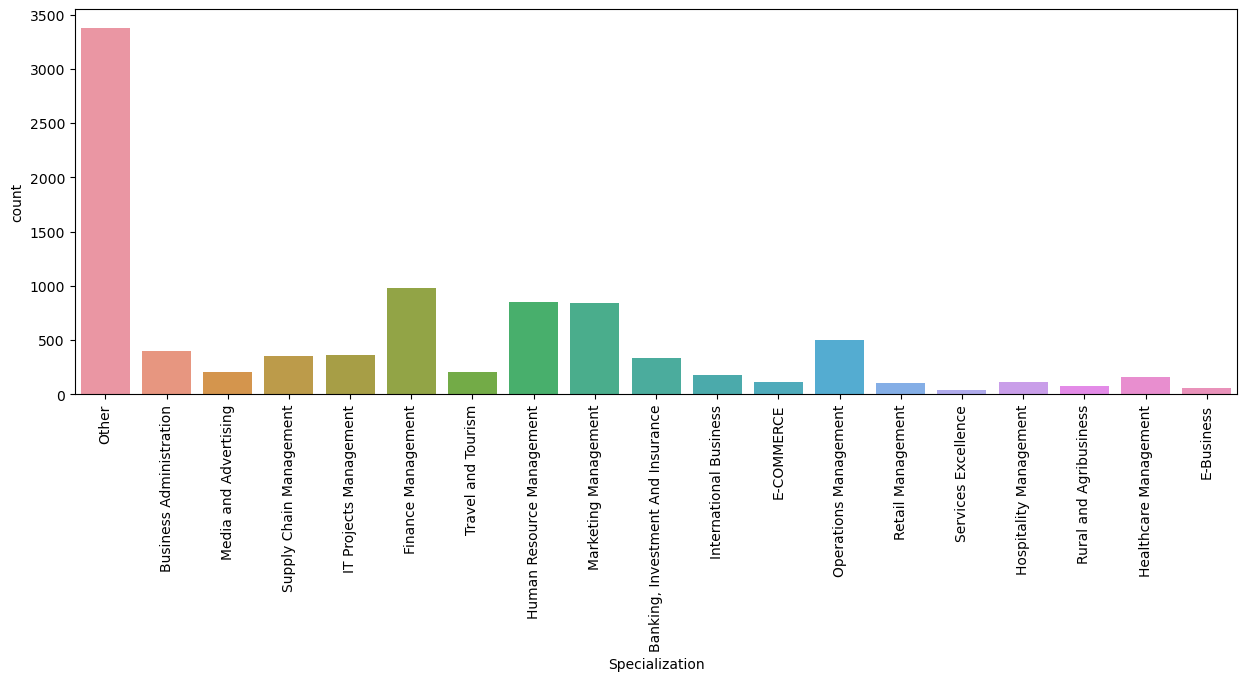

In [17]:
# Plotting count plot of 'Specialization' to see the data distribution:-

plt.figure(figsize=(15,5))
sns.countplot(x='Specialization', data=lead_df1)
plt.xticks(rotation=90)
plt.show()

In [17]:
#Again calculate the percentage of missing values

lead_df1.isnull().mean() * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                    0.000000
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

<font color=blue>Analyzing columns with missing values less than 30% </font>

In [18]:

missing_cols = list(lead_df1.columns[ (100 * lead_df1.isnull().mean() < 30) & (100 * lead_df1.isnull().mean() > 0)] )


In [20]:
print(missing_cols)

['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Country', 'What is your current occupation', 'What matters most to you in choosing a course']


In [21]:
lead_df1[missing_cols].dtypes

Lead Source                                       object
TotalVisits                                      float64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
What is your current occupation                   object
What matters most to you in choosing a course     object
dtype: object

#### Analyzing the Columns having less than 1% of null values
- Lead Source        - .38
- TotalVisits        - 1.48
- PageViewPerVisits  - 1.48
- LastActivity       - 1.11

In [23]:
# Checking value counts of 'Last Activity':-

lead_df1['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

#### Observation

As we do not know the last activity of leads which are missing values and most frequent value is 'Email Opened' so we can impute missing value with 'Email Opened'. Because it is categorical column

In [21]:
# Imputing missing values with 'Email Opened' because it is categorical column

lead_df1['Last Activity'] = lead_df1['Last Activity'].replace(np.nan, 'Email Opened')

In [25]:
# Checking value counts of 'Lead Source':-

lead_df1['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

#### Observation 

- From above data we can see that there are two 'Google' and 'google' ,so better to replace 'google' with 'Google'.

- 'Google' is having highest number occurance so we can impute missing values with 'Google'. Becuase It is categorical column

In [22]:
# Replace 'google' with 'Google' :-

lead_df1['Lead Source']=lead_df1['Lead Source'].replace('google','Google')

In [27]:
# Verifying value counts again:-

lead_df1['Lead Source'].value_counts()

Lead Source
Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

In [23]:
# Imputing missing values with 'Google':-

lead_df1['Lead Source'] = lead_df1['Lead Source'].fillna('Google')

In [24]:
# Imputing missing value with 'median' value for both 'TotalVisits' and 'Page Views Per Visit' columns,because these two are numerical columns-

lead_df1['TotalVisits'] = lead_df1['TotalVisits'].fillna(lead_df1['TotalVisits'].median())

lead_df1['Page Views Per Visit'] = lead_df1['Page Views Per Visit'].fillna(lead_df1['Page Views Per Visit'].median())

#### Analyzing the Columns having less than 30% but more than 1% of null values

- Country                                 - 26.6
- TWhat is your current occupation        - 29.11
- What matters most to you                - 29.31


In [18]:
# Checking value count of 'What matters most to you in choosing a course' variable:-

lead_df1['What matters most to you in choosing a course'].value_counts(normalize=True)*100

What matters most to you in choosing a course
Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: proportion, dtype: float64

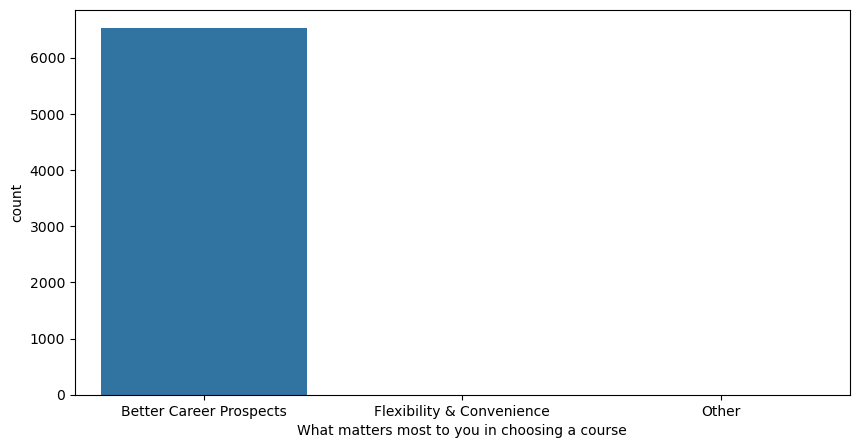

In [26]:
# Checking value distribution by ploting count plot:-
plt.figure(figsize=(10,5))
sns.countplot(x = lead_df1['What matters most to you in choosing a course'], data = lead_df1 )
plt.show()

#### Observation 

From the graph and value counts, 'Better Career Prospects' is the most frequent value so we can replace missing value with 'Better Career Prospects'. Becuase this is a categorical column

In [25]:
# Imputing missing value with 'Better Career Prospects' :-

lead_df1['What matters most to you in choosing a course'] = lead_df1['What matters most to you in choosing a course'].fillna('Better Career Prospects')

In [29]:
# Checking value counts of 'What is your current occupation' variable:-

lead_df1['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

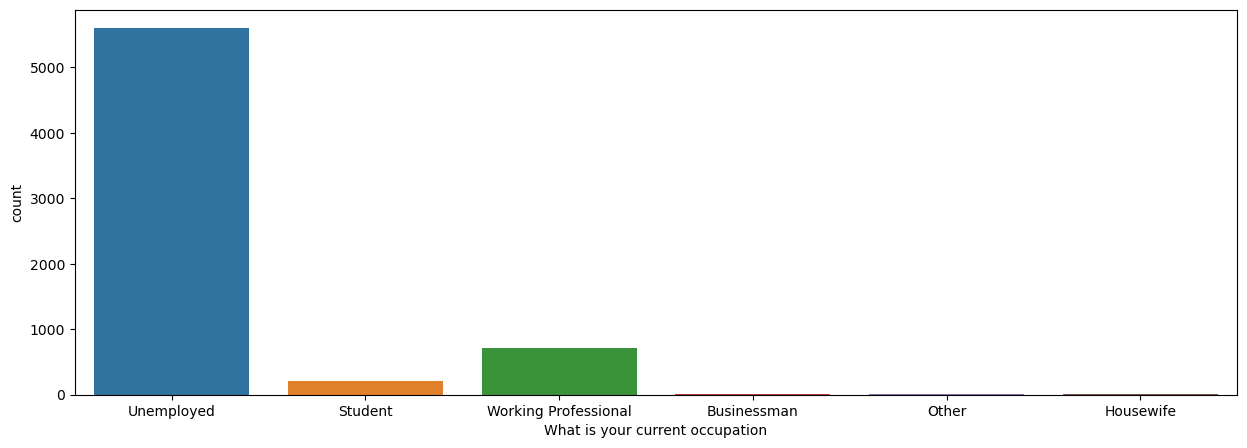

In [36]:
# Verify value count n column 'What is your current occupation' by count plot:-

plt.figure(figsize=(15,5))
sns.countplot(x= lead_df1['What is your current occupation'], data = lead_df1)
plt.show()

#### Observation
We see that 'Unemployed' count is highest but we will impute missing values with 'Other' considering we do not know current occupation of lead.So we will create a separate category called 'Other'. Unemployed is not the right value to impute, though it is the most ferquent value

In [26]:
# Imputing missing value with 'Other'

lead_df1['What is your current occupation'] = lead_df1['What is your current occupation'].fillna('Other')

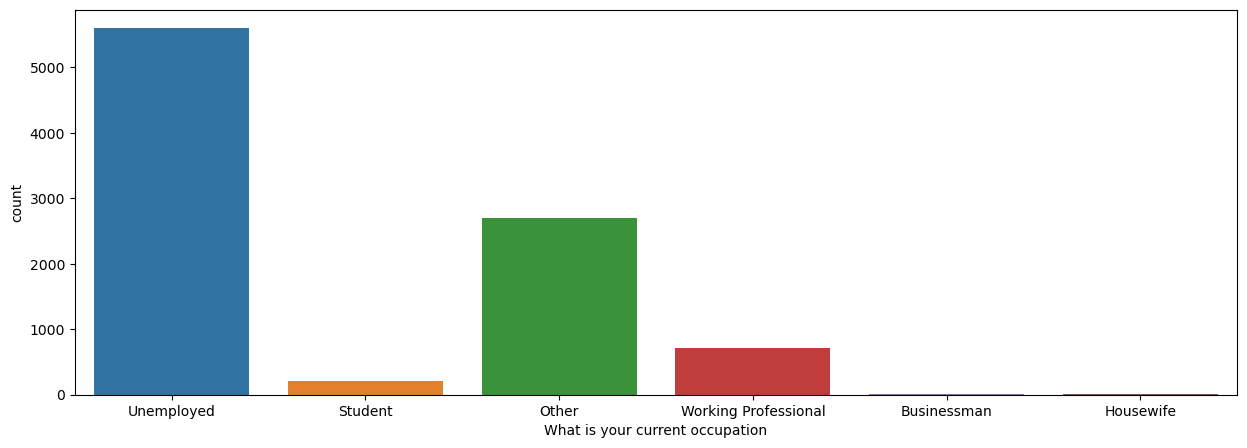

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(x= lead_df1['What is your current occupation'], data = lead_df1)
plt.show()

In [22]:
# Checking value counts of 'Country' column:-

lead_df1['Country'].value_counts(normalize=True)*100

Country
India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switze

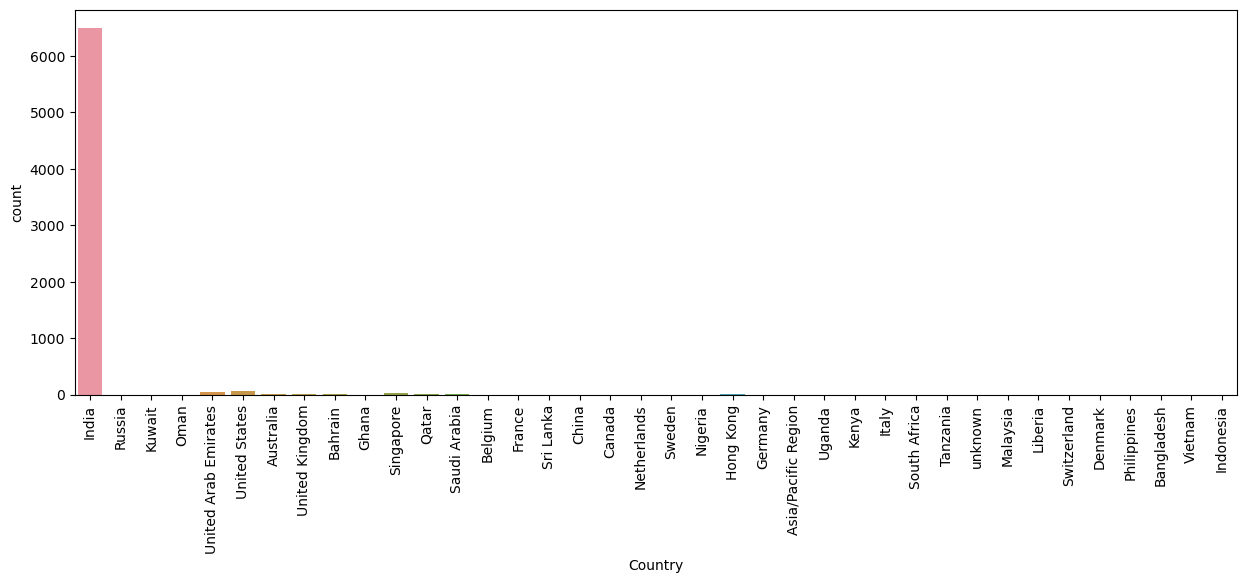

In [40]:
# Plotting count plot to visualize counts of data of 'Country' column:-

plt.figure(figsize=(15,5))
sns.countplot(x= lead_df1['Country'], data = lead_df1)
plt.xticks(rotation=90)
plt.show()

#### Observation
From plot and value counts we can see that 'India' count is highest so we can impute missing values with 'India', becuase it is categorical column

In [27]:
# Replacing missing values with most frequent value 'India' in categorical column 'Country':-

lead_df1['Country'] = lead_df1['Country'].fillna('India')

In [24]:
lead_df1.Country.value_counts(normalize=True)*100

Country
India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switze

#### Observation

Before imputation in 'Country' column % of 'india' was  ~95% but after imputing missing values with 'India' it's % became ~96% ,which will not contribute much in analysis so better to drop it cause data is skewed here.

In [28]:
# Dropping 'Country' column from dataframe:-

lead_df1 = lead_df1.drop('Country', axis = 1)

In [29]:
# Now checking shape of the dataframe:-

lead_df1.shape

(9240, 27)

In [27]:
#Again calculate the percentage of missing values

lead_df1.isnull().mean() * 100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

#### Observation 
We can see that there is no missing values now.

#### Checking 'Prospect ID' and 'Lead Number' columns 

In [53]:
lead_df1['Lead Number'].value_counts

<bound method IndexOpsMixin.value_counts of 0       660737
1       660728
2       660727
3       660719
4       660681
         ...  
9235    579564
9236    579546
9237    579545
9238    579538
9239    579533
Name: Lead Number, Length: 9240, dtype: int64>

In [54]:
lead_df1['Lead Number'].head()

0    660737
1    660728
2    660727
3    660719
4    660681
Name: Lead Number, dtype: int64

#### Observation 
'Lead Number' both do not have duplicate values. "Prospect ID' unique id given to customer, which means these two columns identify each data uniquely so working as unique Id and will not make any significant impact on our model.So we can drop it.

In [30]:
# Dropping 'Prospect ID' and 'Lead Number' variables:-

lead_df1 = lead_df1.drop(['Prospect ID','Lead Number'],axis = 1)

In [31]:
lead_df1.dtypes

Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Specialization                                    object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article                                 object
X Education Forums                                object
Newspaper                                         object
Digital Advertisement          

To get the more understanding of the features which are useful for prediction, we try to get the unique values that each column having

In [29]:
# Checking the value_counts of remaining variables for better data understanding :-

cols = lead_df1.columns.values

for i in cols:
    print(i,'='*20)
    print(lead_df1[i].value_counts( normalize = True ) * 100 , '\n')

Lead Origin ====================
Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: proportion, dtype: float64 

Lead Source ====================
Lead Source
Google               31.482684
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
Click2call            0.043290
Social Media          0.021645
Live Chat             0.021645
Press_Release         0.021645
Pay per Click Ads     0.010823
blog                  0.010823
WeLearn               0.010823
welearnblog_Home      0.010823
youtubechannel        0.010823
testone               0.010823
NC_EDM                0.010823
Name: proportion, dtype: float64 

Do Not Email ====================
D

#### Observation 

From the above value_counts data we can see that columns
<br>
- <b> 'I agree to pay the amount through cheque' , 'Get updates on DM Content', 'Update me on Supply Chain Content', 'Receive More Updates About Our Courses', 'Through Recommendations', 'Digital Advertisement', 'Newspaper, 'X Education Forums', 'Newspaper Article', 'Magazine', 'Search', Do Not Call',  'What matters most to you in choosing a course', 'Do Not Email'
</b> -- these columns having approx. 99% of data of one type only 
  
<br>  
So having highly imbalance data or skewed data and these variables will not contribute significatly to analysis ,so better to drop these columns.

In [31]:
# Dropping variables which are having imbalanced data:-

lead_df1 = lead_df1.drop(['I agree to pay the amount through cheque' , 'Get updates on DM Content', 
                          'Update me on Supply Chain Content', 'Receive More Updates About Our Courses', 
                          'Through Recommendations', 'Digital Advertisement', 'Newspaper', 'X Education Forums', 
                          'Newspaper Article', 'Magazine', 'Search', 'Do Not Call', 
                          'What matters most to you in choosing a course'],
                         axis =1)



In [32]:
# Checking shape of the dataframe after dropping variables:-

lead_df1.shape

(9240, 12)

In [32]:
lead_df1.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

<font color='blue'>As per problem statement 'Converted' is our target variable.</font>

The target variable. Indicates whether a lead has been successfully converted or not.
- 0: Not converted into lead.
- 1: Lead has been successfully Converted.

Analyze the data with respect to target variable, to get know their impact on traget

### Univariate Analysis

In [37]:
#Checking value count of target variable 'Converted':-

lead_df1.Converted.value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

In [34]:
# Calculating conversion rate:-

Converted = (sum(lead_df1['Converted'])/len(lead_df1))*100
Converted

38.53896103896104

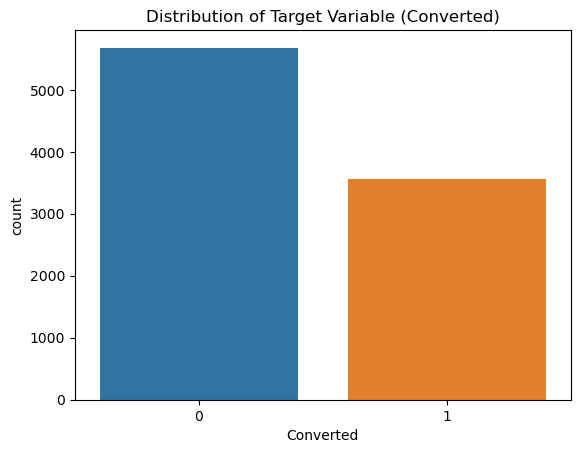

In [35]:
#Plotting count plot to get clear view of data distribution of 'Converted' column:-

sns.countplot(x = lead_df1.Converted, data = lead_df1 )
plt.title("Distribution of Target Variable (Converted)")
plt.show()

In [36]:
#Checking ratio of imbalance:-

(lead_df1['Converted'] == 1).sum() / ( lead_df1['Converted'] == 0 ).sum() * 100

62.70470153195985

#### Observation

From value count and  plot  as well as ratio calculation, we found that data is properly balanced with respect to ratio.

In [37]:
lead_df1.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

<font color='blue'>Analyzing Categorical Variables with Target </font>

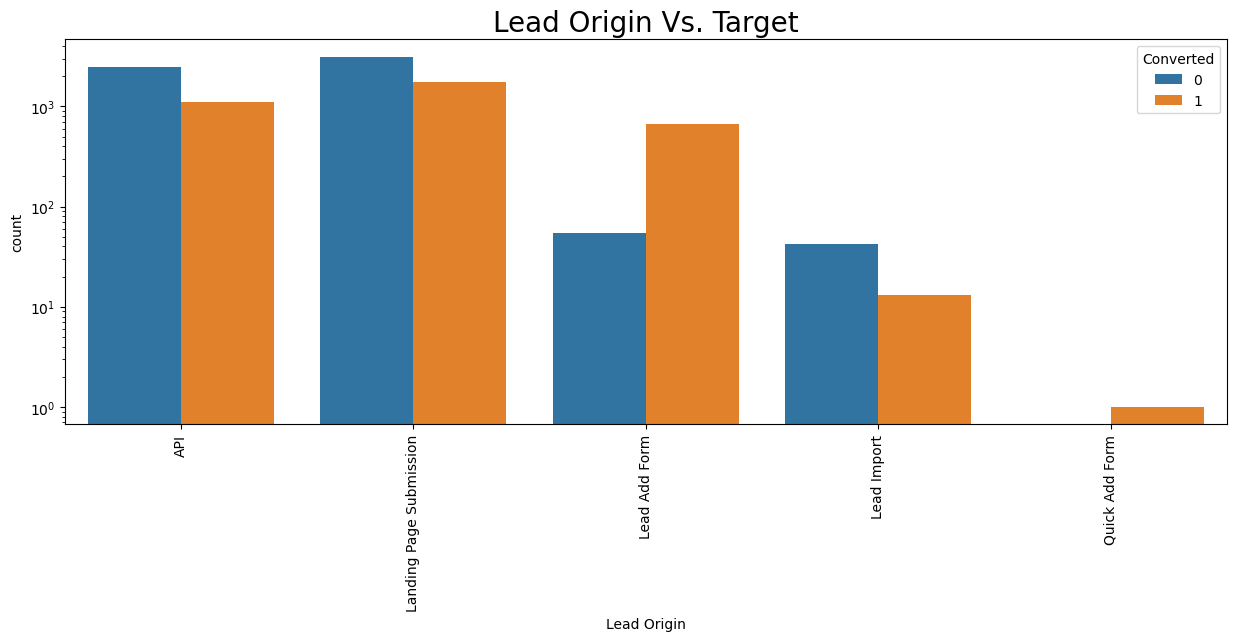

In [38]:
# 'Lead Origin' And Target :-

plt.figure(figsize = (15,5))

ax=sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_df1)

# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
# ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Lead Origin Vs. Target',fontsize=20)
ax.set_yscale('log')

plt.show()

In [39]:
lead_df1[lead_df1['Converted'] == 1]['Lead Origin'].value_counts( normalize = True ) * 100

Lead Origin
Landing Page Submission    49.648975
API                        31.311429
Lead Add Form              18.646448
Lead Import                 0.365066
Quick Add Form              0.028082
Name: proportion, dtype: float64

#### Observation 
From above plot we can observe and calculate that :

- Conversion rate for 'API' is ~ 31% and for 'Landing Page Submission' is ~49%.
- For 'Lead Add Form' number of conversion is more than unsuccessful conversion.
- Count of 'Lead Import' is lesser.

#### Recommendation
To improve overall lead conversion rate, we need to focus more on improving lead conversion of API and Landing Page Submission origin and generate more leads from Lead Add Form

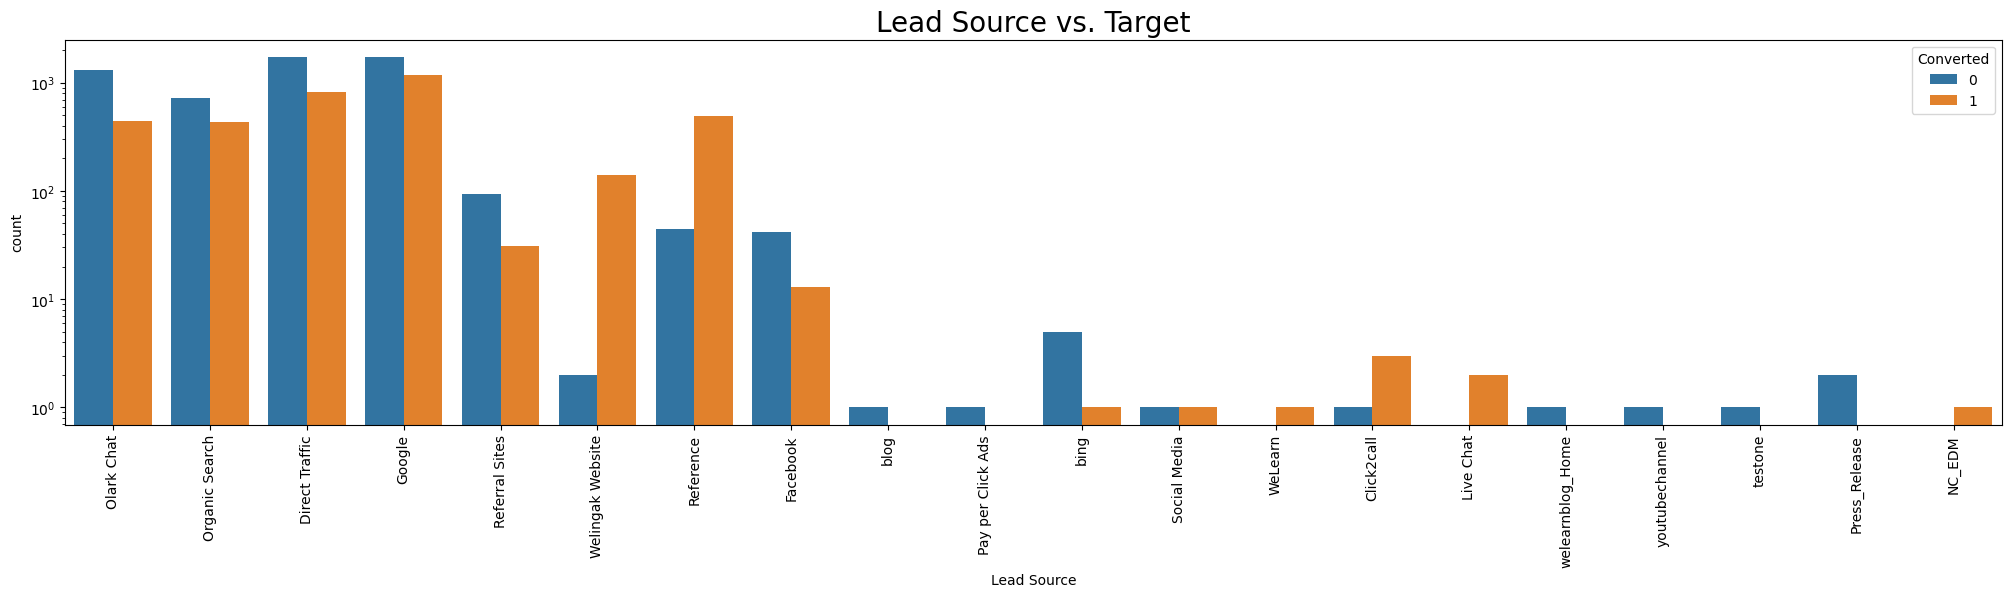

In [40]:
# 'Lead Source' And Target :-

plt.figure(figsize = (25,5))

ax=sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df1)
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
# ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Lead Source vs. Target',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

In [41]:
lead_df1['Lead Source'].value_counts( normalize = True ) * 100

Lead Source
Google               31.482684
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
Click2call            0.043290
Social Media          0.021645
Live Chat             0.021645
Press_Release         0.021645
Pay per Click Ads     0.010823
blog                  0.010823
WeLearn               0.010823
welearnblog_Home      0.010823
youtubechannel        0.010823
testone               0.010823
NC_EDM                0.010823
Name: proportion, dtype: float64

In [33]:
# Combining all low frequency values together for better analysis:-

lead_df1['Lead Source'] = lead_df1['Lead Source'].replace(['NC_EDM','testone','youtubechannel','welearnblog_Home', 
                                                           'WeLearn','blog','Pay per Click Ads','Press_Release',
                                                           'Live Chat', 'Social Media', 'Click2call',  'bing'], 'Others')

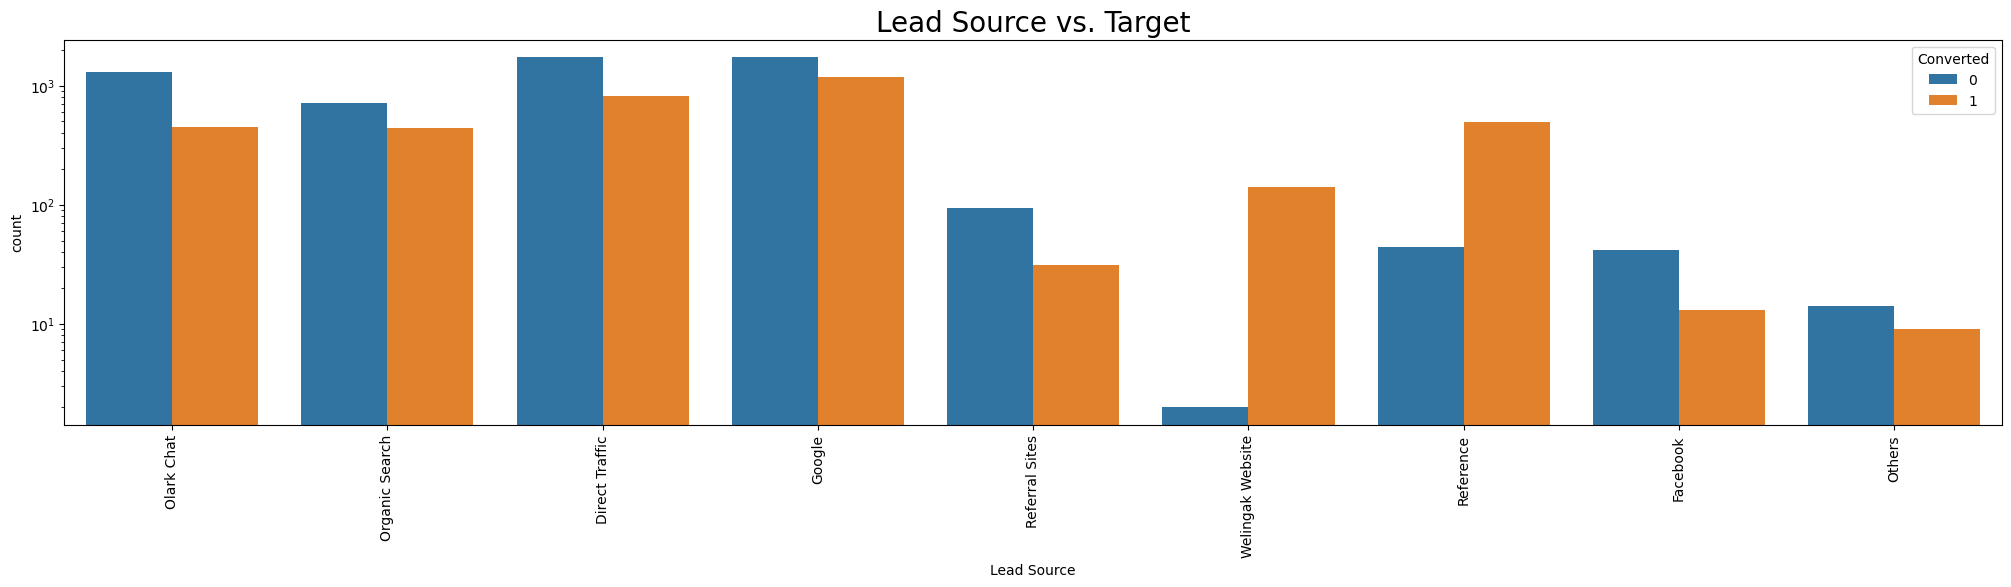

In [43]:
# Plot again 'Lead Source' And Target :-

plt.figure(figsize = (25,5))

ax=sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df1)
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
# ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Lead Source vs. Target',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

In [44]:
lead_df1[lead_df1['Converted'] == 1]['Lead Source'].value_counts( normalize = True ) * 100

Lead Source
Google              33.024431
Direct Traffic      22.971076
Reference           13.760180
Olark Chat          12.580736
Organic Search      12.243752
Welingak Website     3.931480
Referral Sites       0.870542
Facebook             0.365066
Others               0.252738
Name: proportion, dtype: float64

#### Observation
 
From above plot we can observe:
- Google and Direct traffic generates maximum number of leads.
- Conversion rate of 'Reference' and 'Welingak Website' leads is high.
 
#### Recommendation

To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [49]:
lead_df1.groupby("Do Not Email")[["Converted"]].value_counts(normalize = True) * 100


Do Not Email  Converted
No            0            59.522690
              1            40.477310
Yes           0            83.923706
              1            16.076294
Name: proportion, dtype: float64

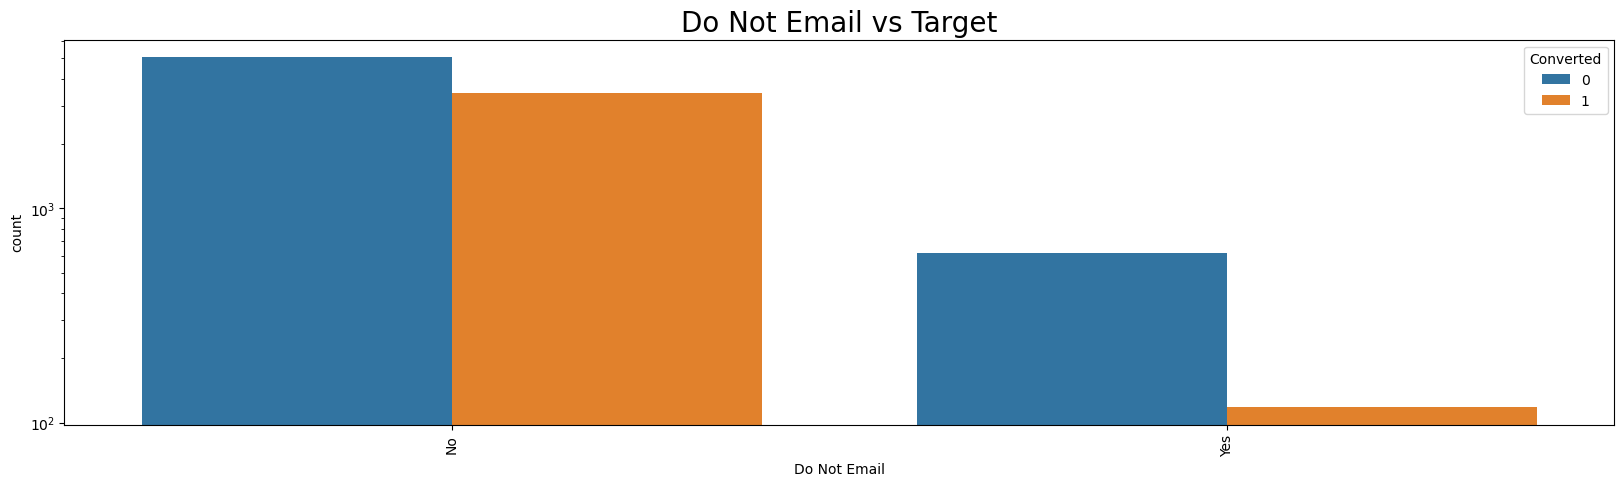

In [45]:
# 'Do Not Email' vs 'Converted' (Traget)

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_df1)
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
# ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Do Not Email vs Target',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

#### Observation
 
- People who not opted for mail option having more conversion.

In [50]:
lead_df1.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

In [52]:
lead_df1['Last Activity'].value_counts( normalize = True ) * 100

Last Activity
Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: proportion, dtype: float64

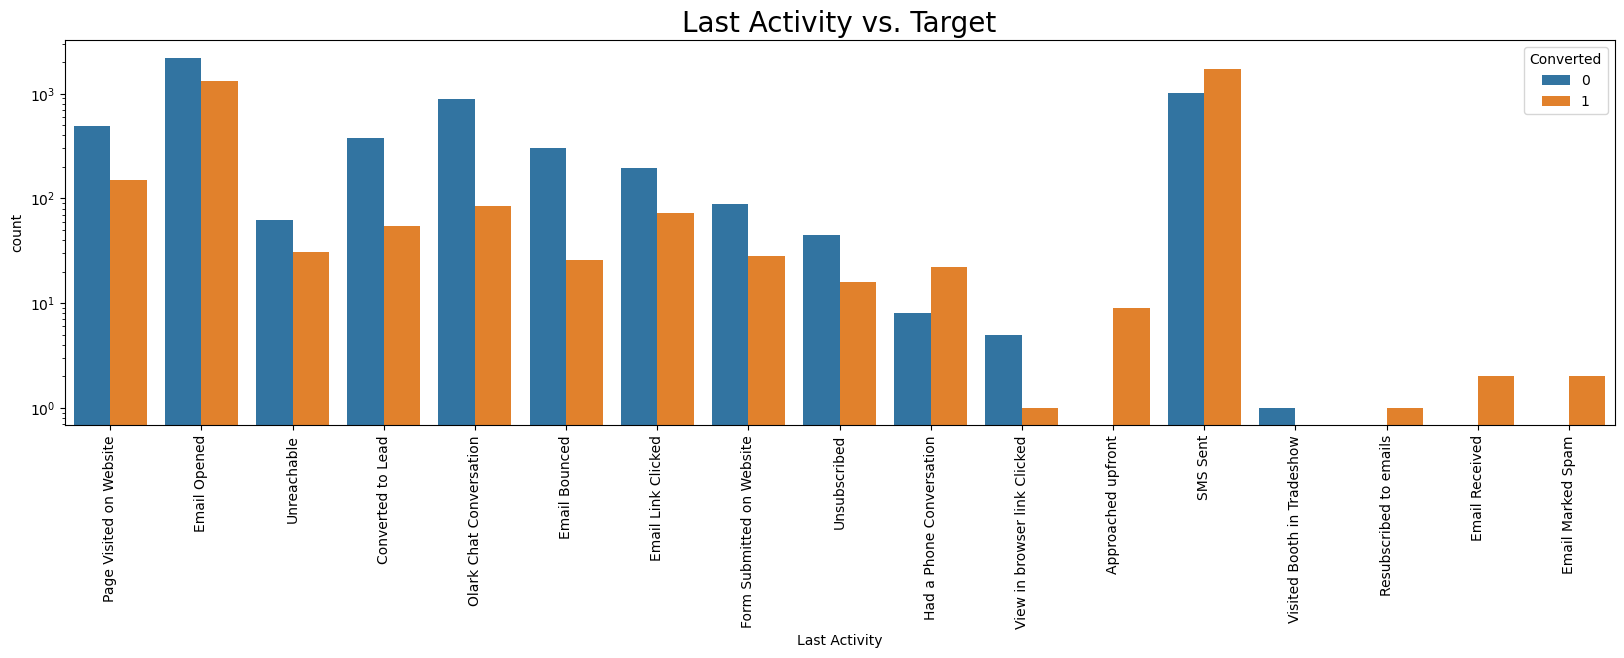

In [51]:
# Analyze 'Last Activity' vs Target

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df1)
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
# ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Last Activity vs. Target',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

- There having many options which are in very low percentage, if we combines all those, then it become easier for analysis

In [53]:
lead_df1['Last Activity'].value_counts( normalize = True ) * 100

Last Activity
Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: proportion, dtype: float64

In [34]:
# Combining all low frequency values together as 'Others' for better analysis

lead_df1['Last Activity'] = lead_df1['Last Activity'].replace(['Resubscribed to emails','Visited Booth in Tradeshow',
                                                               'Email Marked Spam','Email Received', 
                                                               'View in browser link Clicked', 'Approached upfront',
                                                               'Had a Phone Conversation', 'Unsubscribed'
                                                               ],'Others')

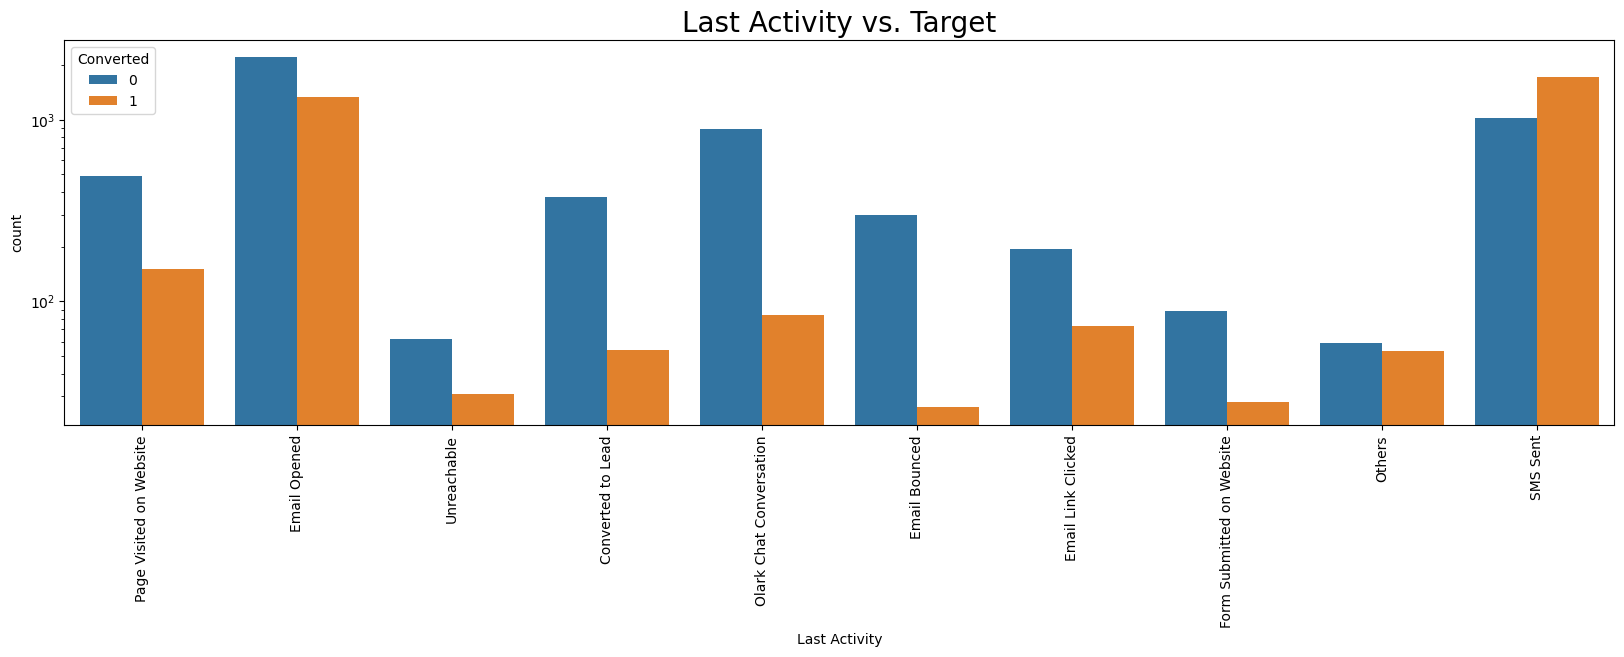

In [55]:
# Re-plot

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df1)
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
# ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Last Activity vs. Target',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

In [56]:
lead_df1.groupby("Last Activity")[["Converted"]].value_counts(normalize = True) * 100


Last Activity              Converted
Converted to Lead          0            87.383178
                           1            12.616822
Email Bounced              0            92.024540
                           1             7.975460
Email Link Clicked         0            72.659176
                           1            27.340824
Email Opened               0            62.316384
                           1            37.683616
Form Submitted on Website  0            75.862069
                           1            24.137931
Olark Chat Conversation    0            91.366906
                           1             8.633094
Others                     0            52.678571
                           1            47.321429
Page Visited on Website    0            76.406250
                           1            23.593750
SMS Sent                   1            62.914390
                           0            37.085610
Unreachable                0            66.666667
             

#### Observation

From value counts and plot we can observe :
 
- Conversion rate for last activity of 'SMS Sent'is ~63%.
- Highest last activity of leads is 'Email Opened' ~38% .

In [58]:
lead_df1.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

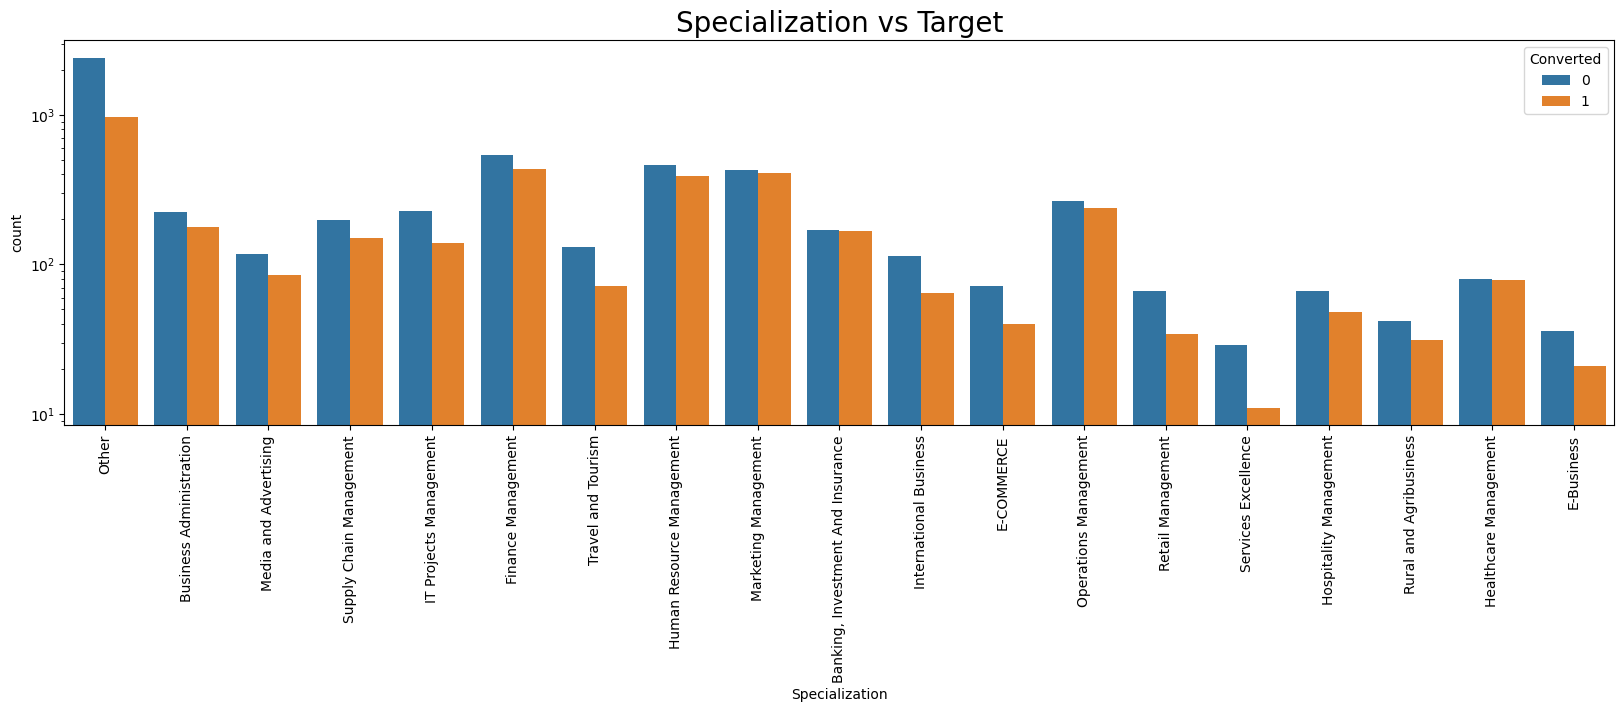

In [59]:
# Analyzing 'Specialization' vs Target

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "Specialization", hue = "Converted", data = lead_df1)
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
# ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Specialization vs Target',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

In [60]:
lead_df1['Specialization'].value_counts( normalize = True ) * 100

Specialization
Other                                36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: proportion, dtype: float64

In [40]:
lead_df1.groupby("Specialization")[["Converted"]].value_counts(normalize = True) * 100


Specialization                     Converted
Banking, Investment And Insurance  0            50.591716
                                   1            49.408284
Business Administration            0            55.583127
                                   1            44.416873
E-Business                         0            63.157895
                                   1            36.842105
E-COMMERCE                         0            64.285714
                                   1            35.714286
Finance Management                 0            55.327869
                                   1            44.672131
Healthcare Management              0            50.314465
                                   1            49.685535
Hospitality Management             0            57.894737
                                   1            42.105263
Human Resource Management          0            54.245283
                                   1            45.754717
IT Projects Management     

### Observation

We can observe from above count plot of 'Specialization' in 'Management' sector in general having more converstion than other like 'Healthcare Management' having approx. 50% conversion. 

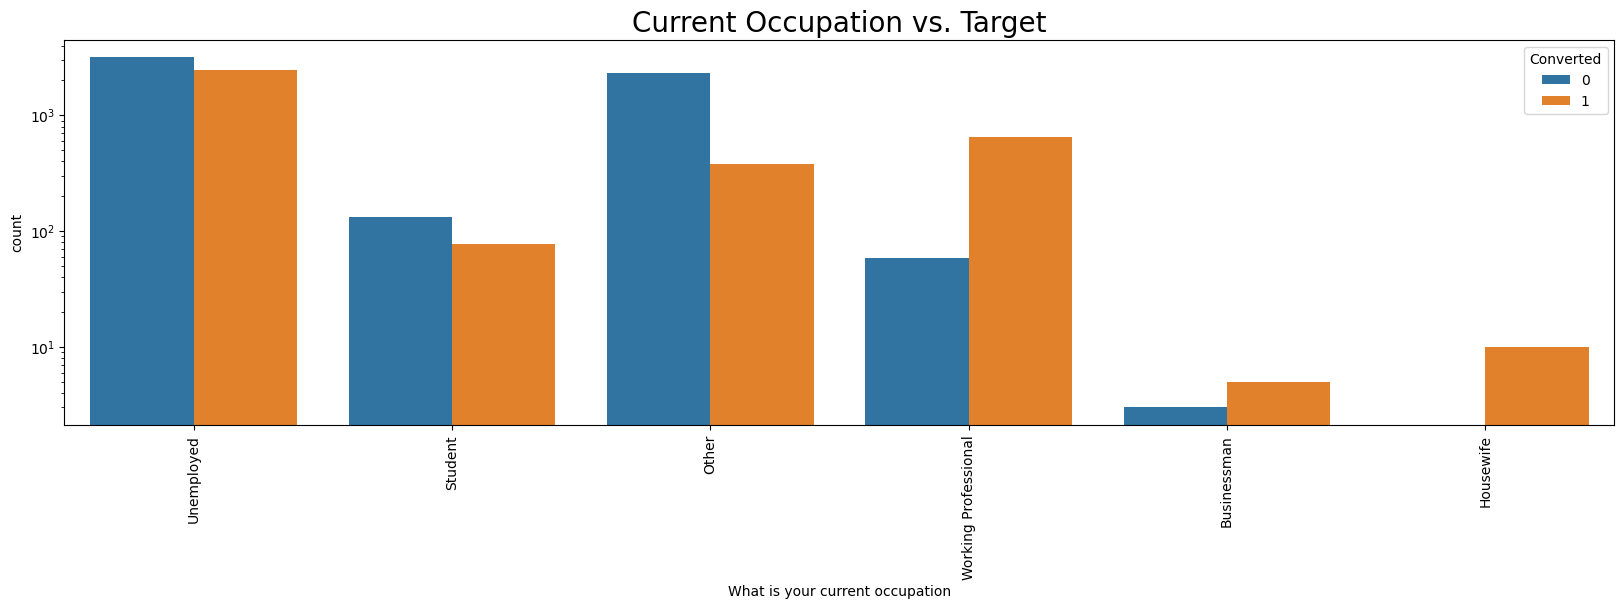

In [62]:
# Analyzing 'What is your current occupation' vs. Target

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_df1)
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
# ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Current Occupation vs. Target',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

In [63]:
lead_df1['What is your current occupation'].value_counts( normalize = True ) * 100

What is your current occupation
Unemployed              60.606061
Other                   29.285714
Working Professional     7.640693
Student                  2.272727
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64

In [64]:
lead_df1.groupby("What is your current occupation")[["Converted"]].value_counts(normalize = True) * 100


What is your current occupation  Converted
Businessman                      1             62.500000
                                 0             37.500000
Housewife                        1            100.000000
Other                            0             85.957132
                                 1             14.042868
Student                          0             62.857143
                                 1             37.142857
Unemployed                       0             56.410714
                                 1             43.589286
Working Professional             1             91.643059
                                 0              8.356941
Name: proportion, dtype: float64

#### Observation

- 'Unemployed' occupation  generationg more number of leads approx. 61% also having ~44% conversion rate.
- Conversion rate is higher for 'Working Professionals' and 'Housewife'.

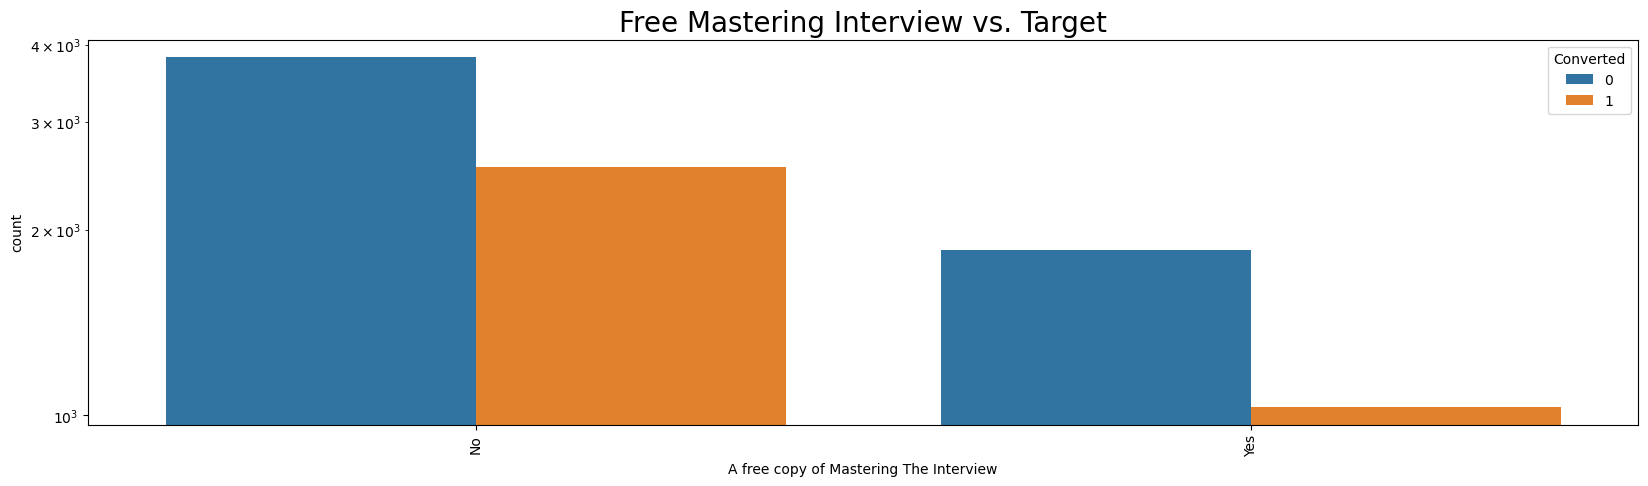

In [65]:
# Analyzing 'A free copy of Mastering The Interview' vs. Target

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_df1)
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
# ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Free Mastering Interview vs. Target',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

In [66]:
lead_df1['A free copy of Mastering The Interview'].value_counts( normalize = True ) * 100

A free copy of Mastering The Interview
No     68.744589
Yes    31.255411
Name: proportion, dtype: float64

In [67]:
lead_df1.groupby("A free copy of Mastering The Interview")[["Converted"]].value_counts(normalize = True) * 100


A free copy of Mastering The Interview  Converted
No                                      0            60.154282
                                        1            39.845718
Yes                                     0            64.335180
                                        1            35.664820
Name: proportion, dtype: float64

#### Observation

- This features does not shows much impact on conversion both 'Yes/N0' having approx. 30% conversion rate, 'No' opetion having more leads approx. 69%

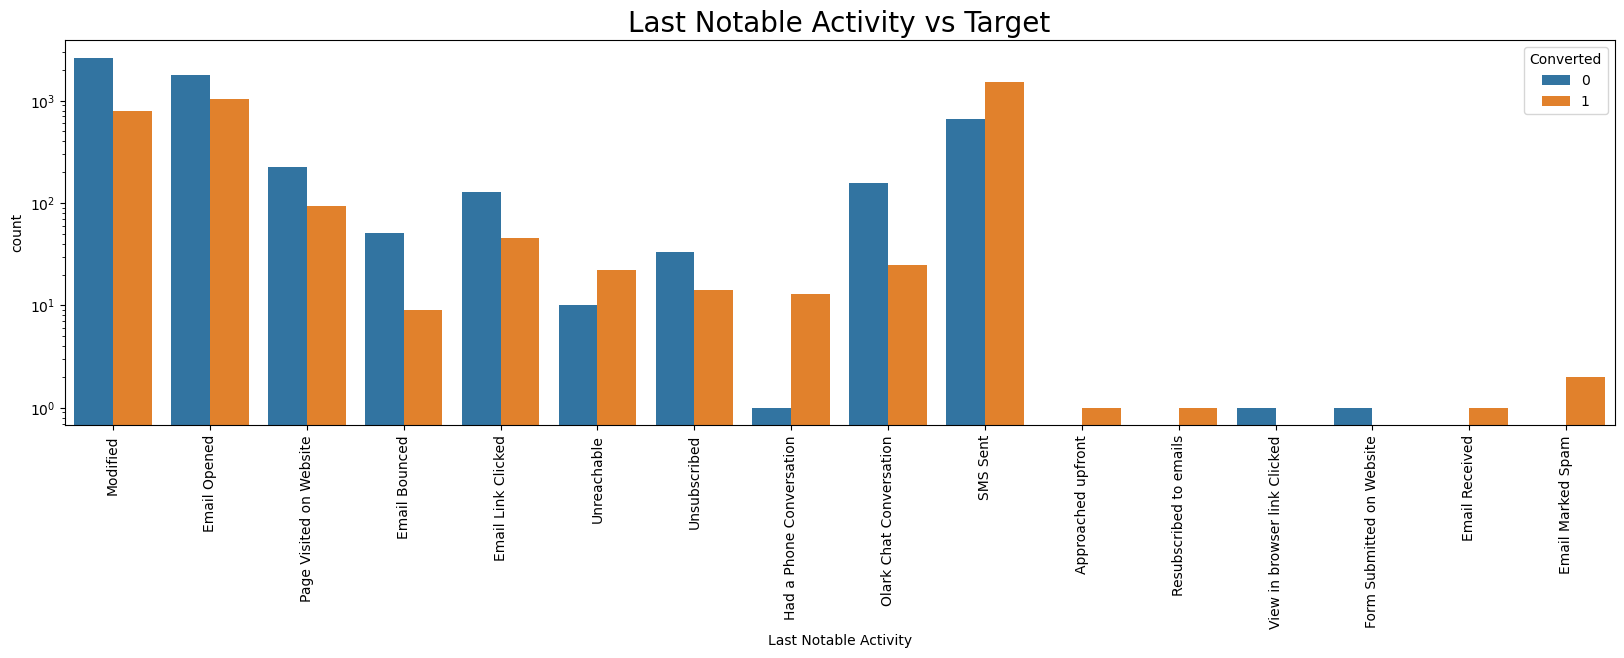

In [26]:
# Analyzing 'Last Notable Activity' vs Target

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_df1)
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
# ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Last Notable Activity vs Target',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

In [27]:
lead_df1['Last Notable Activity'].value_counts( normalize = True) * 100

Last Notable Activity
Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: proportion, dtype: float64

In [35]:
# Combining all low frequency values together under label 'Others':-

lead_df1['Last Notable Activity'] = lead_df1['Last Notable Activity'].replace(['Email Received','Form Submitted on Website',
                                                                               'View in browser link Clicked',
      'Resubscribed to emails','Approached upfront','Email Marked Spam'],'Others')

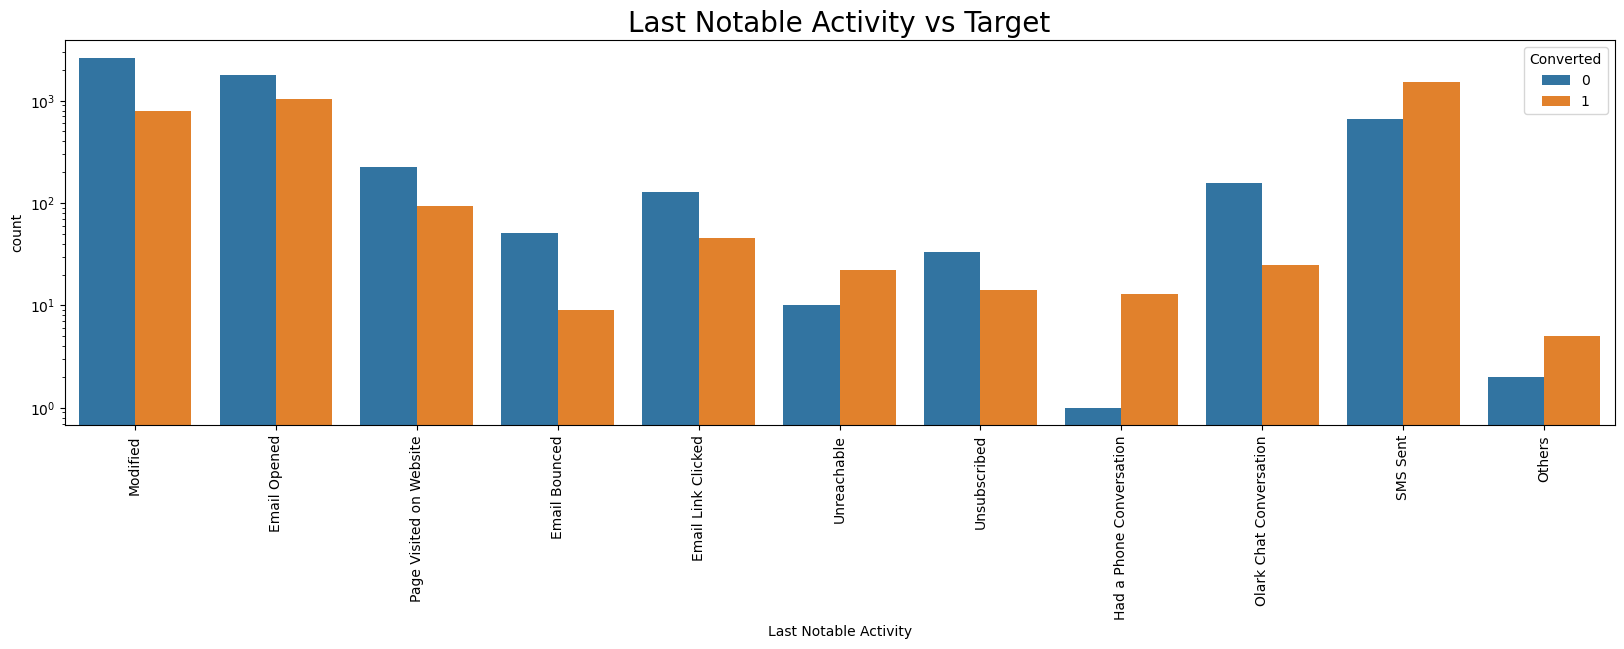

In [29]:
# Plot again 'Last Notable Activity' vs Target to understand the effect

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_df1)
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
# ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Last Notable Activity vs Target',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

In [27]:
lead_df1.groupby("Last Notable Activity")[["Converted"]].value_counts(normalize = True) * 100


Last Notable Activity     Converted
Email Bounced             0            85.000000
                          1            15.000000
Email Link Clicked        0            73.988439
                          1            26.011561
Email Opened              0            63.070393
                          1            36.929607
Had a Phone Conversation  1            92.857143
                          0             7.142857
Modified                  0            77.017904
                          1            22.982096
Olark Chat Conversation   0            86.338798
                          1            13.661202
Others                    1            71.428571
                          0            28.571429
Page Visited on Website   0            70.754717
                          1            29.245283
SMS Sent                  1            69.429098
                          0            30.570902
Unreachable               1            68.750000
                          0      

#### Observation

- Analysis of <b> 'Last Notable Activity' </b> with target shows it have the nearly same effect as shown in case of <b>'Last  Activity' </b>, so it like redundant feature, so we can drop this
 
- Similarly <b>'A free copy of Mastering The Interview'</b> shown no impact on the target, so we drop this feature also


In [36]:
# Dropping 'Last Notable Activity' and 'A free copy of Mastering The Interview' features

lead_df1 = lead_df1.drop(['Last Notable Activity' , 'A free copy of Mastering The Interview'], axis = 1)


In [37]:
lead_df1.shape

(9240, 10)

In [44]:
lead_df1.dtypes

Lead Origin                         object
Lead Source                         object
Do Not Email                        object
Converted                            int64
TotalVisits                        float64
Total Time Spent on Website          int64
Page Views Per Visit               float64
Last Activity                       object
Specialization                      object
What is your current occupation     object
dtype: object

<font color='blue'>Analyzing Numerical Variables</font>

#### Outlier Analysis 

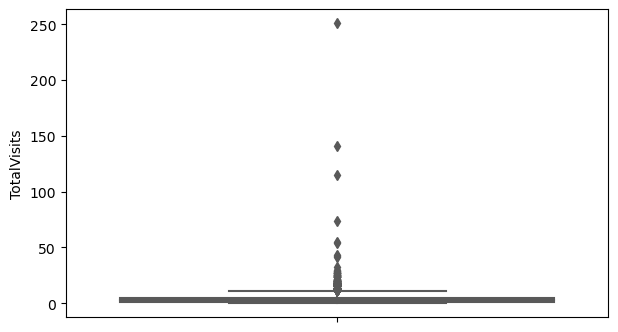

In [27]:
# Plotting box plots to analyze the data distribution of 'TotalVisits':-

plt.figure(figsize = (7,4))
# sns.boxplot(lead_df1['TotalVisits'],orient='v',palette='Set2')
sns.boxplot(y = lead_df1['TotalVisits'] , palette='Set2')

plt.show()

In [37]:
lead_df1['TotalVisits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

#### Observation

We can see from above box plot and statistical data, that only upper range outliers are present in data, so need to treat outliers.

In [38]:
q1 = lead_df1['TotalVisits'].describe()["25%"]# 25th Percentile
q3 = lead_df1['TotalVisits'].describe()["75%"]# 75th Percentile
iqr = q3-q1
upper_bound = q3 + 1.5 * iqr
# lower_bound = q1 - 1.5 * iqr
lead_df1['TotalVisits'] = np.where(lead_df1['TotalVisits'] > upper_bound, upper_bound, lead_df1['TotalVisits'] )

# app_df['TotalVisits'] = np.where(app_df[i] < lower_bound, lower_bound, app_df[i] )

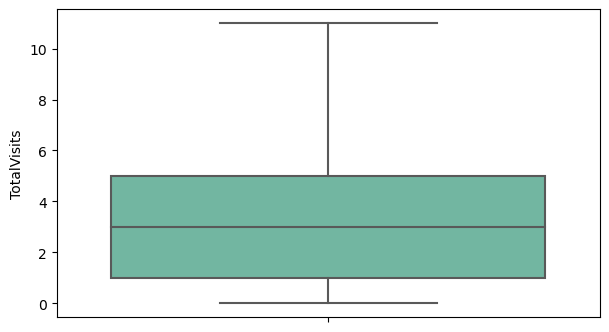

In [40]:
# Verifying outliers after removing it :-

plt.figure(figsize = (7,4))
sns.boxplot(y=lead_df1['TotalVisits'],palette='Set2')
plt.show()


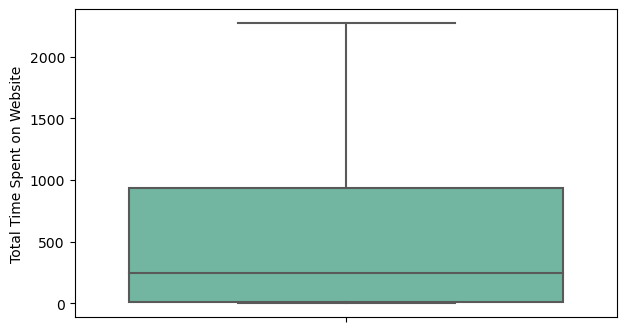

In [41]:
# Plotting box plots to visualize data distribution of 'Total Time Spent on Website':-

plt.figure(figsize=(7,4))
sns.boxplot(y=lead_df1['Total Time Spent on Website'],palette='Set2')
plt.show()

#### Observation'

From above box plot we can see that there is no outlier in data.

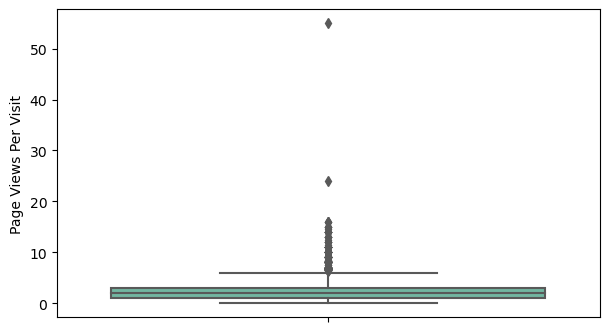

In [42]:
# Plotting box plots to visualize data distribution of 'Page Views Per Visit':-

plt.figure(figsize=(7,4))
sns.boxplot(y=lead_df1['Page Views Per Visit'],palette='Set2')
plt.show()

In [43]:
lead_df1['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

#### Observation

We can see from above box plot and statistical data that only upper range outliers are present in data, so no need to lower range treatment of outliers.

In [39]:
q1 = lead_df1['Page Views Per Visit'].describe()["25%"]# 25th Percentile
q3 = lead_df1['Page Views Per Visit'].describe()["75%"]# 75th Percentile
iqr = q3-q1
upper_bound = q3 + 1.5 * iqr
# lower_bound = q1 - 1.5 * iqr
lead_df1['Page Views Per Visit'] = np.where(lead_df1['Page Views Per Visit'] > upper_bound, upper_bound, lead_df1['Page Views Per Visit'] )

# app_df['TotalVisits'] = np.where(app_df[i] < lower_bound, lower_bound, app_df[i] )

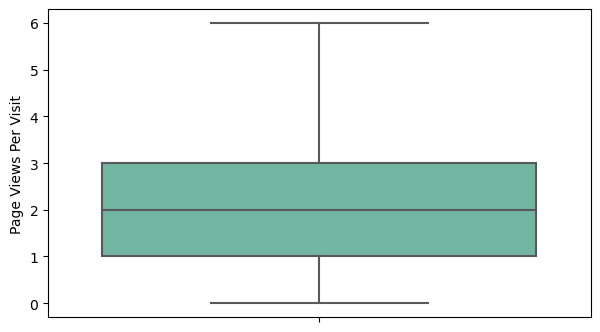

In [45]:
# Verify 'Page Views Per Visit' column after treatment of outlier

plt.figure(figsize=(7,4))
sns.boxplot(y=lead_df1['Page Views Per Visit'],palette='Set2')
plt.show()

### Bivariate Analysis

- Analyzing with Target

In [47]:
lead_df1.dtypes

Lead Origin                         object
Lead Source                         object
Do Not Email                        object
Converted                            int64
TotalVisits                        float64
Total Time Spent on Website          int64
Page Views Per Visit               float64
Last Activity                       object
Specialization                      object
What is your current occupation     object
dtype: object

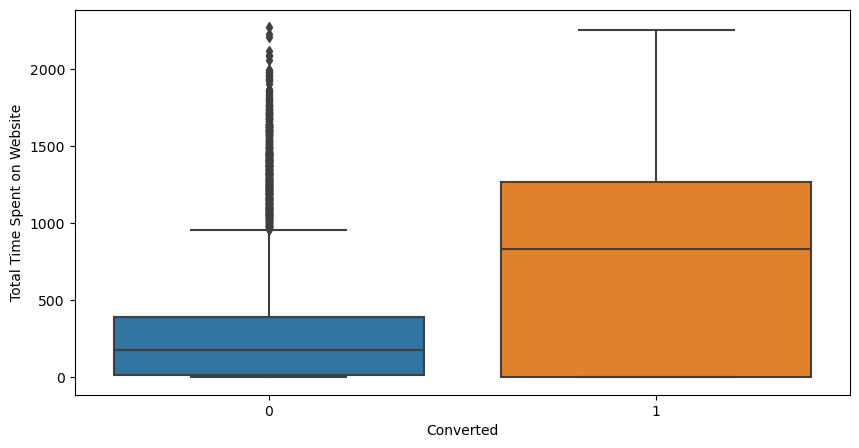

In [46]:
# Plotting box plot of "Total Time Spent on Website" vs CTarget to check data distribution:-

plt.figure(figsize=(10,5))
sns.boxplot(x='Converted', y='Total Time Spent on Website',data=lead_df1)
plt.show()

#### Observation

Leads spending more time on website are  more likely to opt for curses or converted.

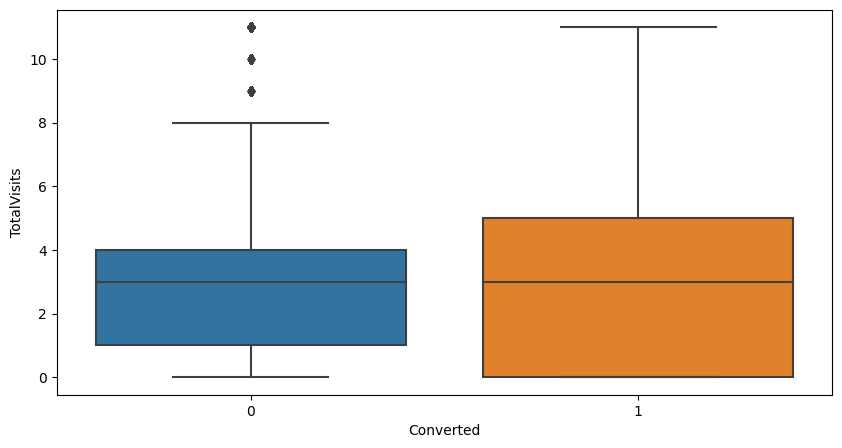

In [48]:
# Plotting box plot between "Total Visits" vs Target variable to check data distribution:-

plt.figure(figsize=(10,5))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df1)
plt.show()

#### Observation

From above plot we can see that median for converted and non-converted is approx same with respect to 'TotalVisits'. But conversation rate is higher with respect of increse number of visits

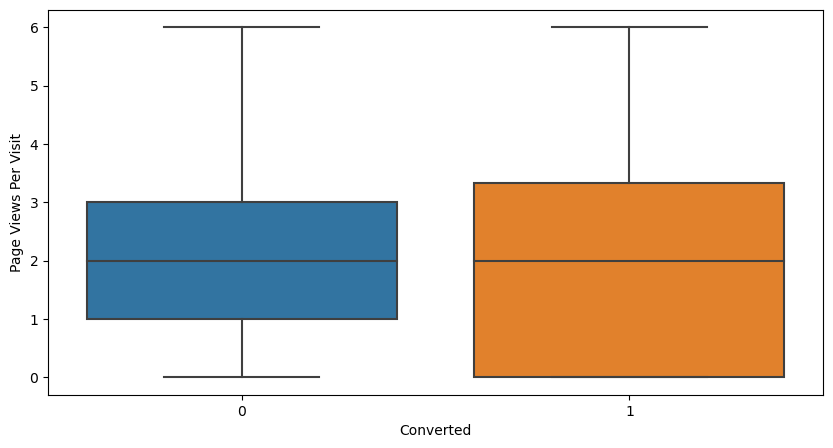

In [49]:
# Plotting box plot between "Page Views Per Visit" vs Target variable to check data distribution:-

plt.figure(figsize=(10,5))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_df1)
plt.show()

#### Observation

From above plot we can see that median for converted and non-converted is approx same with respect to 'Page Views Per Visit'. But conversation rate is higher with respect of increse number of page view per visit

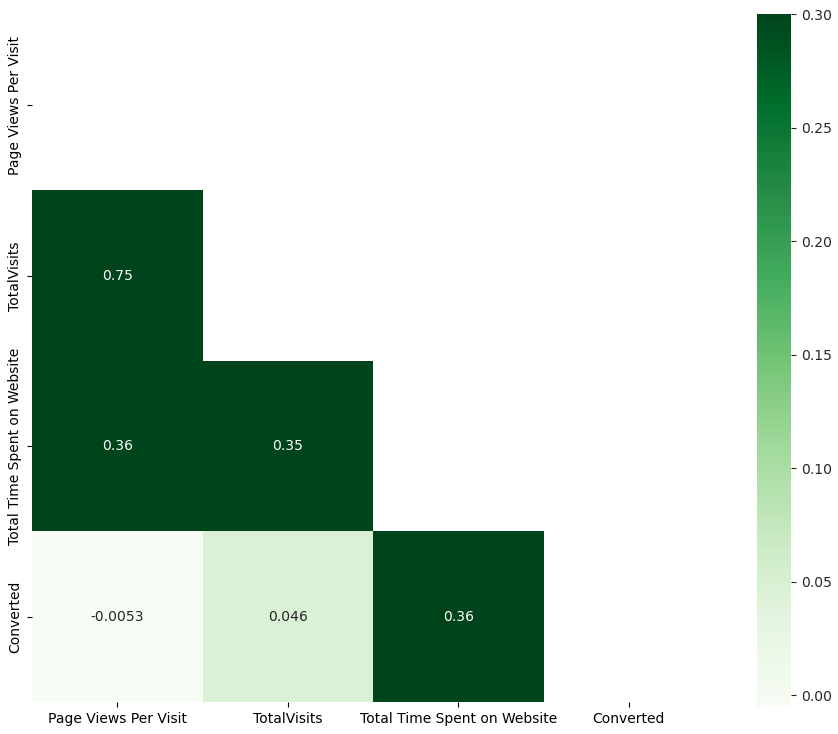

In [34]:
corr = lead_df1[['Page Views Per Visit','TotalVisits','Total Time Spent on Website','Converted']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot = True,cmap='Greens')
   

#### Observation

- 'TotalVisits' and 'Page Views per Visit' are highly correlated with correlation of .75
- 'Total Time Spent on Website' has correlation of 0.36 with target variable 'Converted'.

## Step 2.  Preparing the data for modeling (Train- Test split, Rescaling )

#### 2.1.  Converting some binary variables (Yes/No) to 0/1

In [49]:
lead_df1['Do Not Email'].value_counts()

Do Not Email
No     8506
Yes     734
Name: count, dtype: int64

In [40]:
# 'Do Not Email' categorical variable ('Yes/No') to (1/0)

lead_df1['Do Not Email'] = lead_df1['Do Not Email'].map({'Yes' : 1, 'No' : 0 })

In [41]:
lead_df1['Do Not Email'].value_counts()

Do Not Email
0    8506
1     734
Name: count, dtype: int64

In [37]:
lead_df1.head()

Lead Origin     Lead Source  Do Not Email  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity           Specialization What is your current occupation
0                      API      Olark Chat             0          0          0.0                            0                   0.0  Page Visited on Website                    Other                      Unemployed
1                      API  Organic Search             0          0          5.0                          674                   2.5             Email Opened                    Other                      Unemployed
2  Landing Page Submission  Direct Traffic             0          1          2.0                         1532                   2.0             Email Opened  Business Administration                         Student
3  Landing Page Submission  Direct Traffic             0          0          1.0                          305                   1.0              Unreachable    Media and Advertising                      Unemployed
4  Landing Page Submission          Google             0          1          2.0                         1428                   1.0        Converted to Lead                    Other                      Unemployed

#### 2.2.  Creating Dummy Variable

#### For categorical variables with multiple levels, create dummy features

In [42]:
# Creating dummy variable 'Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation','Specialization' categorical variables and dropping the first one using 'drop_first=True':-

dummies = pd.get_dummies(lead_df1[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
                             'Specialization']], drop_first=True).astype('int')

dummies.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  What is your current occupation_Housewife  What is your current occupation_Other  What is your current occupation_Student  What is your current occupation_Unemployed  What is your current occupation_Working Professional  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  \
0                                    0                          0                        0                           0                     0                   0                       1                           0                   0                      0                           0                             0                            0                                 0                           0                                        0                                      0                     0                                      1                       0                          0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0                                     0   
1                                    0                          0                        0                           0                     0                   0                       0                           1                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0                                     0   
2                                    1                          0                        0                           0                     0                   0                       0                           0                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                                          0                                      0                                        1                                           0                                                  0                                          1                          0                          0                                  0                                     0   
3                                    1             

In [43]:
# Adding dummy variables dataset 'dummies' to original dataset 'lead_df1':-

lead_df1 = pd.concat([dummies,lead_df1],axis = 1)

In [54]:
lead_df1.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  What is your current occupation_Housewife  What is your current occupation_Other  What is your current occupation_Student  What is your current occupation_Unemployed  What is your current occupation_Working Professional  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  \
0                                    0                          0                        0                           0                     0                   0                       1                           0                   0                      0                           0                             0                            0                                 0                           0                                        0                                      0                     0                                      1                       0                          0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0                                     0   
1                                    0                          0                        0                           0                     0                   0                       0                           1                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0                                     0   
2                                    1                          0                        0                           0                     0                   0                       0                           0                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                                          0                                      0                                        1                                           0                                                  0                                          1                          0                          0                                  0                                     0   
3                                    1             

In [44]:
# Dropping 'Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation','Specialization' columns for which dummies variables were created

lead_df1 = lead_df1.drop(['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
                          'Specialization'], axis = 1)

In [56]:
lead_df1.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  What is your current occupation_Housewife  What is your current occupation_Other  What is your current occupation_Student  What is your current occupation_Unemployed  What is your current occupation_Working Professional  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  \
0                                    0                          0                        0                           0                     0                   0                       1                           0                   0                      0                           0                             0                            0                                 0                           0                                        0                                      0                     0                                      1                       0                          0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0                                     0   
1                                    0                          0                        0                           0                     0                   0                       0                           1                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0                                     0   
2                                    1                          0                        0                           0                     0                   0                       0                           0                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                                          0                                      0                                        1                                           0                                                  0                                          1                          0                          0                                  0                                     0   
3                                    1             

In [45]:
lead_df1.shape

(9240, 49)

In [38]:
lead_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin_Landing Page Submission                   9240 non-null   int32  
 1   Lead Origin_Lead Add Form                             9240 non-null   int32  
 2   Lead Origin_Lead Import                               9240 non-null   int32  
 3   Lead Origin_Quick Add Form                            9240 non-null   int32  
 4   Lead Source_Facebook                                  9240 non-null   int32  
 5   Lead Source_Google                                    9240 non-null   int32  
 6   Lead Source_Olark Chat                                9240 non-null   int32  
 7   Lead Source_Organic Search                            9240 non-null   int32  
 8   Lead Source_Others                                    9240

Now we have all variables as numeric without any missing values.

#### 2.3 Test-Train Split

In [46]:
# Importing required libraries

from sklearn.model_selection import train_test_split

In [47]:
# Putting response variable to y

y = lead_df1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [48]:
# Putting feature variable to X

X = lead_df1.drop(['Converted'], axis = 1)

X.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  What is your current occupation_Housewife  What is your current occupation_Other  What is your current occupation_Student  What is your current occupation_Unemployed  What is your current occupation_Working Professional  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  \
0                                    0                          0                        0                           0                     0                   0                       1                           0                   0                      0                           0                             0                            0                                 0                           0                                        0                                      0                     0                                      1                       0                          0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0                                     0   
1                                    0                          0                        0                           0                     0                   0                       0                           1                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0                                     0   
2                                    1                          0                        0                           0                     0                   0                       0                           0                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                                          0                                      0                                        1                                           0                                                  0                                          1                          0                          0                                  0                                     0   
3                                    1             

In [49]:
# Splitting the data into train and test with of 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)



In [50]:
# Checking shape of 'X_train' dataset after splitting:-

X_train.shape

(6468, 48)

In [51]:
# Checking shape of 'X_test' dataset after splitting:-

X_test.shape

(2772, 48)

#### 2.4 Feature Scaling

We are using 'StandardScaler' here for scaling.

In [52]:
#Importing required library for scaling :-

from sklearn.preprocessing import StandardScaler

In [65]:
X_train.dtypes

Lead Origin_Landing Page Submission                       int32
Lead Origin_Lead Add Form                                 int32
Lead Origin_Lead Import                                   int32
Lead Origin_Quick Add Form                                int32
Lead Source_Facebook                                      int32
Lead Source_Google                                        int32
Lead Source_Olark Chat                                    int32
Lead Source_Organic Search                                int32
Lead Source_Others                                        int32
Lead Source_Reference                                     int32
Lead Source_Referral Sites                                int32
Lead Source_Welingak Website                              int32
Last Activity_Email Bounced                               int32
Last Activity_Email Link Clicked                          int32
Last Activity_Email Opened                                int32
Last Activity_Form Submitted on Website 

In [53]:
# Creating 'scaler' object for 'StandardScaler':-

scaler = StandardScaler()

# Applying 'fit_transform' to scale the 'train' data set:-

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

# Displaying the head of the data after scaling:-
X_train.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  What is your current occupation_Housewife  What is your current occupation_Other  What is your current occupation_Student  What is your current occupation_Unemployed  What is your current occupation_Working Professional  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  \
1871                                    0                          0                        0                           0                     0                   0                       1                           0                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0                                     0   
6795                                    1                          0                        0                           0                     0                   0                       0                           0                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0                                     0   
3516                                    0                          0                        0                           0                     0                   0                       1                           0                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0                                     0   
8105                                    1 

#### Checking the Correlation Matrix

In [54]:
corr = lead_df1.corr()
corr

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  What is your current occupation_Housewife  What is your current occupation_Other  What is your current occupation_Student  What is your current occupation_Unemployed  What is your current occupation_Working Professional  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  \
Lead Origin_Landing Page Submission                                            1.000000                  -0.307485                -0.081974                   -0.011021             -0.079155            0.082512               -0.512950                    0.057567           -0.000705              -0.262358                   -0.073380                     -0.132344                     0.060657                         -0.030010                    0.028583                                 0.048021                              -0.303385              0.009462                               0.092714                0.068547                   0.030024                                  -0.001898                              -0.085709                                -0.000066                                    0.085987                                          -0.009242                                   0.133649                   0.063297                   0.078808                           0.199558   
Lead Origin_Lead Add Form                                                     -0.307485                   1.000000                -0.022461                   -0.003020             -0.022461           -0.167161               -0.138490                   -0.109655            0.034178               0.853237                   -0.033991                      0.430407                    -0.029214                          0.005436                    0.023219                                -0.018205                              -0.092995              0.019569                              -0.048931                0.105008                  -0.004968                                   0.039627                              -0.185907                                 0.009987                                    0.060272                                           0.196526                                  -0.012501                  -0.012542                  -0.021069                           0.010732   
Lead Origin_Lead Import                                                       -0.081974                  -0.022461                 1.000000                   -0.000805              0.981709           -0.049425               -0.037470                   -0.029233           -0.003866              -0.019165                   -0.009062                     -0.009667                     0.000454                         -0.013348                    0.057675                                -0.008725                              -0.026548             -0.008572                              -0.021110               -0.013360                  -0.007803                                  -0.002547                              -0.021973                                -0.011801                                    0.030714                                          -0.011664                                  -0.009636                  -0.006097                   0.017143                          -0.008283   
Lead Origin_Quick Add Form                              

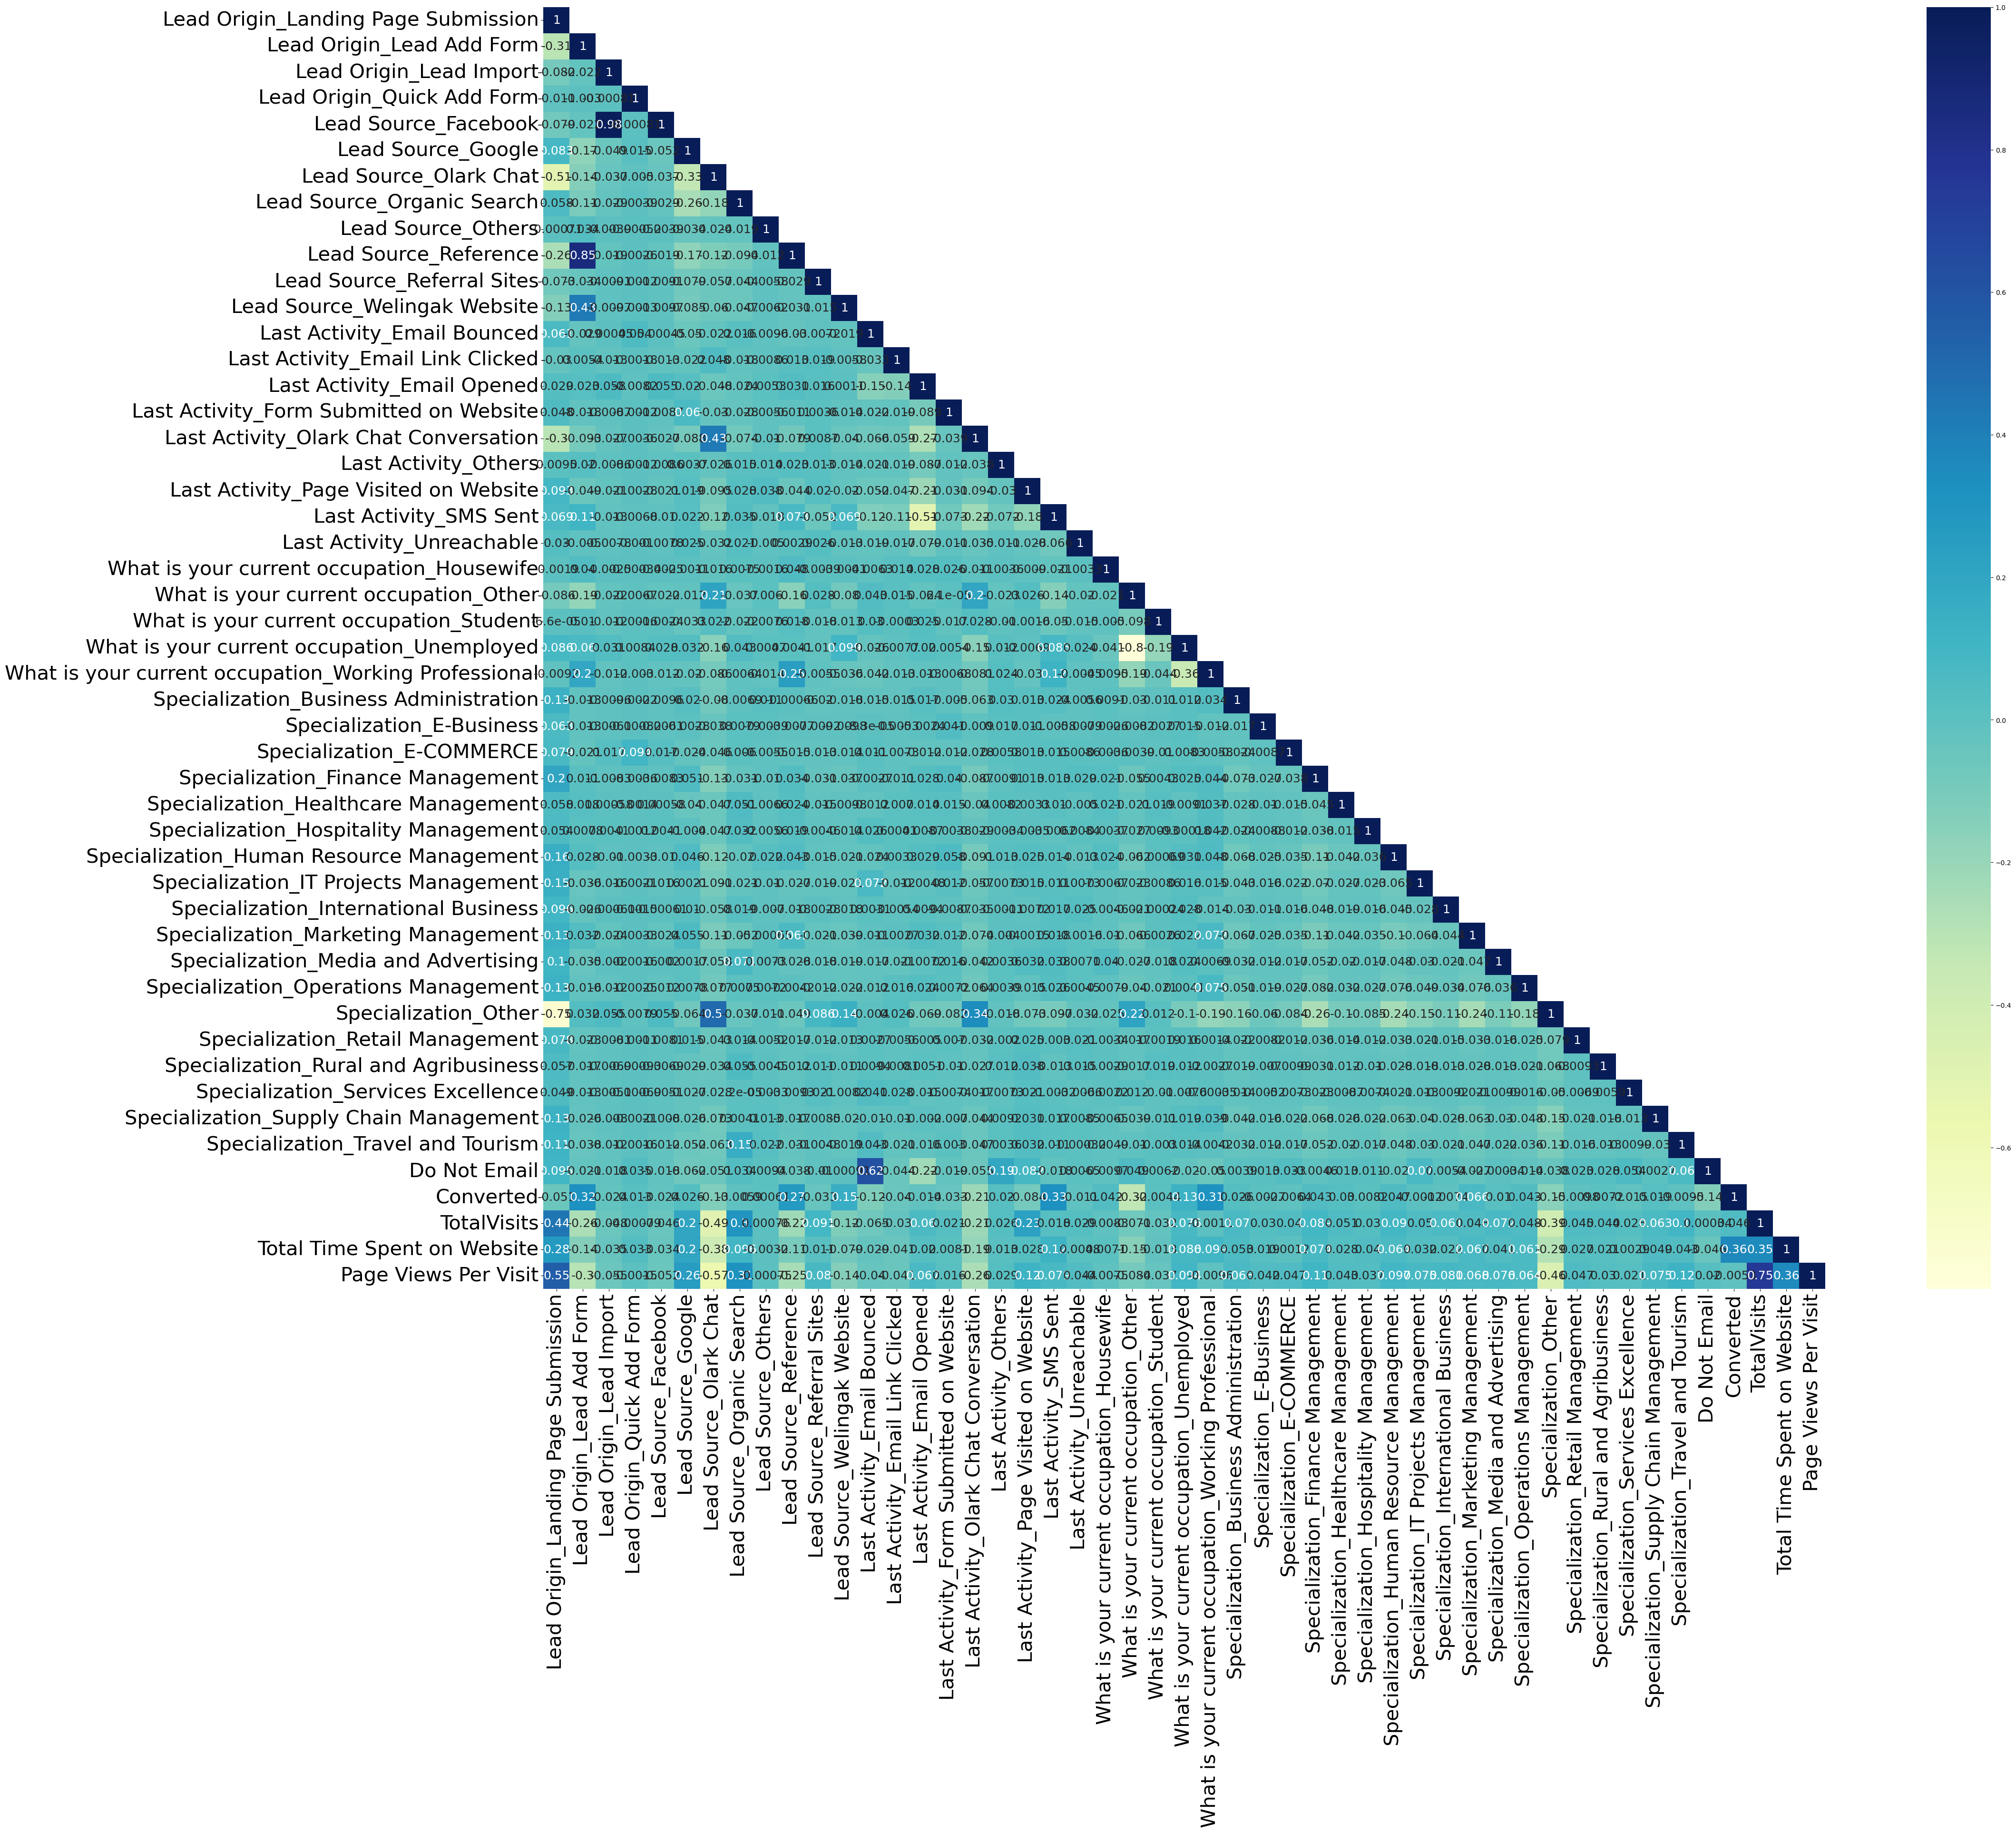

In [61]:
# Let's see the correlation matrix 
# plt.figure(figsize = (20,10))        # Size of the figure

plt.figure(figsize = (55, 35))

mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False


# sns.heatmap(telecom.corr(),annot = True)
# sns.heatmap(corr, mask=mask, square=True, annot=True);

sns.heatmap(corr, mask=mask, square=True, annot=True , cmap="YlGnBu" ,annot_kws={"size": 18})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# plt.tight_layout()

plt.show()

In [62]:
corr

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  What is your current occupation_Housewife  What is your current occupation_Other  What is your current occupation_Student  What is your current occupation_Unemployed  What is your current occupation_Working Professional  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  \
Lead Origin_Landing Page Submission                                            1.000000                  -0.307485                -0.081974                   -0.011021             -0.079155            0.082512               -0.512950                    0.057567           -0.000705              -0.262358                   -0.073380                     -0.132344                     0.060657                         -0.030010                    0.028583                                 0.048021                              -0.303385              0.009462                               0.092714                0.068547                   0.030024                                  -0.001898                              -0.085709                                -0.000066                                    0.085987                                          -0.009242                                   0.133649                   0.063297                   0.078808                           0.199558   
Lead Origin_Lead Add Form                                                     -0.307485                   1.000000                -0.022461                   -0.003020             -0.022461           -0.167161               -0.138490                   -0.109655            0.034178               0.853237                   -0.033991                      0.430407                    -0.029214                          0.005436                    0.023219                                -0.018205                              -0.092995              0.019569                              -0.048931                0.105008                  -0.004968                                   0.039627                              -0.185907                                 0.009987                                    0.060272                                           0.196526                                  -0.012501                  -0.012542                  -0.021069                           0.010732   
Lead Origin_Lead Import                                                       -0.081974                  -0.022461                 1.000000                   -0.000805              0.981709           -0.049425               -0.037470                   -0.029233           -0.003866              -0.019165                   -0.009062                     -0.009667                     0.000454                         -0.013348                    0.057675                                -0.008725                              -0.026548             -0.008572                              -0.021110               -0.013360                  -0.007803                                  -0.002547                              -0.021973                                -0.011801                                    0.030714                                          -0.011664                                  -0.009636                  -0.006097                   0.017143                          -0.008283   
Lead Origin_Quick Add Form                              

### Observation

The heatmap and correlation matrix clearly shows some features are highly coorelated with eac other, and which variable have high collinearity with the target variable. - We will refer this map for building the logistic model so as to validate different correlated values along with VIF & p-value, for identifying the features which are relevant for predicting target.
 
From above heatmap we can see that:- 

- 'Lead Source_Facebook' and 'Lead Origin_Lead Import' having higher correlation of 0.98.
- 'Do Not Email' and 'Last Activity_Email Bounced' having higher correlation. approx. .62.
- 'Lead Origin_Lead Add Form' and 'Lead Source_Referance' having higher correlation of 0.85.
- 'TotalVisits' and 'Page Views Per Visit' having correlation of 0.75.
- Lead Origin_Lead Add Form' ,'Lead Source_Welingak Website', 'Last Activity_SMS Sent' and 'What is your current Occupation_Working Professionals' having positive correlation with our target variable 'Converted'.


## Step 3  Model Building And Training

### Using RFE for feature elimination

In [55]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [56]:
from sklearn.feature_selection import RFE

rfe = RFE(logreg, step=15)             # running RFE with 15 variables as output

rfe = rfe.fit(X_train, y_train)

In [53]:
#Displaying columns selected by RFE and their weights:-

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Origin_Quick Add Form', False, 3),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 3),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 3),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 2),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', Tr

In [57]:
# Storing columns selected by RFE into 'col' and displaying it:-

col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference', 'Lead Source_Welingak Website', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation', 'Last Activity_Others', 'Last Activity_SMS Sent', 'Last Activity_Unreachable', 'What is your current occupation_Housewife', 'What is your current occupation_Other', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Specialization_Hospitality Management', 'Specialization_International Business', 'Specialization_Other', 'Specialization_Retail Management', 'Specialization_Rural and Agribusiness', 'Do Not Email', 'Total Time Spent on Website'], dtype='object')

In [58]:
# Displaying columns which are not selected by RFE:-

X_train.columns[~rfe.support_]

Index(['Lead Origin_Lead Import', 'Lead Origin_Quick Add Form', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Organic Search', 'Lead Source_Referral Sites', 'Last Activity_Email Bounced', 'Last Activity_Form Submitted on Website', 'Last Activity_Page Visited on Website', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_Finance Management', 'Specialization_Healthcare Management', 'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_Marketing Management', 'Specialization_Media and Advertising', 'Specialization_Operations Management', 'Specialization_Services Excellence', 'Specialization_Supply Chain Management', 'Specialization_Travel and Tourism', 'TotalVisits', 'Page Views Per Visit'], dtype='object')

In [59]:
# Creating X_test dataframe with RFE selected variables:-

X_train_rfe = X_train[col]

### Using manual feature elimination

#### Running First Training Model with StatsModels 

### Model 1
Starting with all the columns selected by RFE .

In [60]:
#Importing required 'statsmodels' library:-

import statsmodels.api as sm

In [61]:
# Add a constant:-

X_train_sm = sm.add_constant(X_train_rfe)

# Building first fitted model:-

logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()

In [62]:
# Print a summary of the logistic regression model obtained:-

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.3
Date:                Sat, 17 Aug 2024   Deviance:                       5200.7
Time:                        11:50:32   Pearson chi2:                 7.68e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4086
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8499      1.157     -0.735      0.463      -3.117       1.418
Lead Origin_Landing Page Submission                     -1.0269      0.129     -7.977      0.000      -1.279      -0.775
Lead Origin_Lead Add Form                                2.4879      0.492      5.057      0.000       1.524       3.452
Lead Source_Olark Chat                                   1.0896      0.123      8.843      0.000       0.848       1.331
Lead Source_Others                                       0.5578      0.649      0.860      0.390      -0.714       1.829
Lead Source_Reference                                    0.3274      0.523      0.626      0.531      -0.698       1.352
Lead Source_Welingak Website                             2.7710      0.872      3.180      0.001       1.063       4.479
Last Activity_Email Link Clicked                         0.2481      0.247      1.003      0.316      -0.237       0.733
Last Activity_Email Opened                               0.7632      0.120      6.374      0.000       0.529       0.998
Last Activity_Olark Chat Conversation                   -0.5639      0.198     -2.843      0.004      -0.953      -0.175
Last Activity_Others                                     1.8275      0.335      5.458      0.000       1.171       2.484
Last Activity_SMS Sent                                   1.9175      0.121     15.882      0.000       1.681       2.154
Last Activity_Unreachable                                0.9402      0.372      2.526      0.012       0.211       1.670
What is your current occupation_Housewife               22.7780   1.35e+04      0.002      0.999   -2.65e+04    2.65e+04
What is your current occupation_Other                   -1.0463      1.156     -0.905      0.365      -3.311       1.219
What is your current occupation_Student                  0.1617      1.176      0.137      0.891      -2.144       2.468
What is your current occupation_Unemployed               0.0233      1.154      0.020      0.984      -2.238       2.284
What is your current occupation_Working Professional     2.4335      1.168      2.084      0.037       0.145       4.722
Specialization_Hospitality Management                   -1.0148      0.329     -3.086      0.002      -1.659      -0.370
Specialization_International Business                   -0.3972      0.254     -1.564      0.118      -0.895       0.101
Specialization_Other                                    -0.9860      0.124     -7.924      0.000      -1.230      -0.742
Specialization_Retail Management                        -0.4259      0.338     -1.261      0.207      -1.088       0.236
Specialization_Rural and Agribusiness                    0

### VIF Check for multicollinearity : variance_inflation_factor

In [63]:
# Importing 'variance_inflation_factor' from 'statsmodels':-

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
# Creating dataframe called 'vif' containing names feature variables and their respective VIFs:-

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features    VIF
1                           Lead Origin_Lead Add Form  16.84
4                               Lead Source_Reference  13.60
15         What is your current occupation_Unemployed  11.61
0                 Lead Origin_Landing Page Submission   7.40
13              What is your current occupation_Other   6.56
19                               Specialization_Other   4.82
5                        Lead Source_Welingak Website   3.90
7                          Last Activity_Email Opened   3.83
10                             Last Activity_SMS Sent   3.14
2                              Lead Source_Olark Chat   2.36
16  What is your current occupation_Working Profes...   2.24
8               Last Activity_Olark Chat Conversation   2.09
14            What is your current occupation_Student   1.42
22                                       Do Not Email   1.31
23                        Total Time Spent on Website   1.27
6                    Last Activity_Email Link Clicked   1.22
9                                Last Activity_Others   1.09
11                          Last Activity_Unreachable   1.06
3                                  Lead Source_Others   1.05
18              Specialization_International Business   1.04
17              Specialization_Hospitality Management   1.03
12          What is your current occupation_Housewife   1.03
20                   Specialization_Retail Management   1.02
21              Specialization_Rural and Agribusiness   1.02

### Observation From Model 1

Model status summary shows below are the features which having p>0.05
  
- What is your current occupation_Housewife (0.999)
- What is your current occupation_Student (0.891)
- What is your current occupation_Unemployed (.984)

Below features having high VIF (>3)
 
-  Lead Origin_Lead Add Form	16.84
-  Lead Source_Reference	13.60

Out of these, we first consider the features which having highest p- value ie. <b>'What is your current occupation_Housewife'</b>

#### Dropping insignificant column and updating the model 

In [65]:
#Dropping 'What is your current occupation_Housewife' because of insignificant variable p-value=0.999(p>0.05):-

X_train_new = X_train_rfe.drop(["What is your current occupation_Housewife"], axis = 1)

### Model 2

In [66]:
# Add a constant:-

X_train_sm2 = sm.add_constant(X_train_new)

# Building second fitted model:-

logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial()).fit()

In [67]:
# Print a summary of the logistic regression model obtained:-

logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2603.5
Date:                Sat, 17 Aug 2024   Deviance:                       5207.1
Time:                        11:51:24   Pearson chi2:                 7.67e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4080
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0041      0.768      1.307      0.191      -0.502       2.510
Lead Origin_Landing Page Submission                     -1.0170      0.128     -7.921      0.000      -1.269      -0.765
Lead Origin_Lead Add Form                                2.4907      0.492      5.063      0.000       1.527       3.455
Lead Source_Olark Chat                                   1.0899      0.123      8.846      0.000       0.848       1.331
Lead Source_Others                                       0.5573      0.648      0.860      0.390      -0.714       1.828
Lead Source_Reference                                    0.3276      0.523      0.626      0.531      -0.697       1.353
Lead Source_Welingak Website                             2.7691      0.872      3.177      0.001       1.061       4.477
Last Activity_Email Link Clicked                         0.2541      0.247      1.029      0.303      -0.230       0.738
Last Activity_Email Opened                               0.7692      0.120      6.435      0.000       0.535       1.003
Last Activity_Olark Chat Conversation                   -0.5689      0.198     -2.866      0.004      -0.958      -0.180
Last Activity_Others                                     1.8300      0.335      5.467      0.000       1.174       2.486
Last Activity_SMS Sent                                   1.9203      0.121     15.919      0.000       1.684       2.157
Last Activity_Unreachable                                0.9199      0.376      2.449      0.014       0.184       1.656
What is your current occupation_Other                   -2.9108      0.764     -3.811      0.000      -4.408      -1.414
What is your current occupation_Student                 -1.7035      0.794     -2.144      0.032      -3.260      -0.147
What is your current occupation_Unemployed              -1.8417      0.761     -2.422      0.015      -3.332      -0.351
What is your current occupation_Working Professional     0.5683      0.781      0.728      0.467      -0.962       2.099
Specialization_Hospitality Management                   -1.0148      0.329     -3.087      0.002      -1.659      -0.370
Specialization_International Business                   -0.3970      0.254     -1.563      0.118      -0.895       0.101
Specialization_Other                                    -0.9806      0.124     -7.899      0.000      -1.224      -0.737
Specialization_Retail Management                        -0.4263      0.337     -1.263      0.207      -1.088       0.235
Specialization_Rural and Agribusiness                    0.4939      0.389      1.268      0.205      -0.269       1.257
Do Not Email                                            -1

In [68]:
# Calculating VIF for new model:-

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                           Lead Origin_Lead Add Form  16.83
4                               Lead Source_Reference  13.59
14         What is your current occupation_Unemployed  11.37
0                 Lead Origin_Landing Page Submission   7.30
12              What is your current occupation_Other   6.45
18                               Specialization_Other   4.79
5                        Lead Source_Welingak Website   3.90
7                          Last Activity_Email Opened   3.79
10                             Last Activity_SMS Sent   3.13
2                              Lead Source_Olark Chat   2.35
15  What is your current occupation_Working Profes...   2.21
8               Last Activity_Olark Chat Conversation   2.08
13            What is your current occupation_Student   1.41
21                                       Do Not Email   1.31
22                        Total Time Spent on Website   1.27
6                    Last Activity_Email Link Clicked   1.22
9                                Last Activity_Others   1.09
11                          Last Activity_Unreachable   1.06
3                                  Lead Source_Others   1.05
17              Specialization_International Business   1.04
16              Specialization_Hospitality Management   1.03
19                   Specialization_Retail Management   1.02
20              Specialization_Rural and Agribusiness   1.02

###  from Model 2

Model status summary shows below are the features which having p>0.05
  
- Lead Source_Others (0.390)
- Lead Source_Reference (0.531)
- Last Activity_Email Link Clicked (.304)
- What is your current occupation_Working Professional (0.467)

Below features having high VIF (>3)
 
-  Lead Origin_Lead Add Form	16.84
-  Lead Source_Reference	13.60

Out of these we first considers the features which having highest p- value ie. <b>'Lead Source_Reference'</b>

#### Dropping insignificant column and updating the model

In [69]:
#Dropping 'Lead Source_Reference' because of  high p value (.531)

X_train_new = X_train_new.drop(["Lead Source_Reference"], axis = 1)

### Model 3

In [70]:
#Adding constant:-

X_train_sm3 = sm.add_constant(X_train_new)

# Create a third fitted model:-

logm3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial()).fit()

In [71]:
# Print a summary of the logistic regression model obtained:-

logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2603.7
Date:                Sat, 17 Aug 2024   Deviance:                       5207.4
Time:                        11:53:32   Pearson chi2:                 7.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4080
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0100      0.768      1.315      0.188      -0.495       2.515
Lead Origin_Landing Page Submission                     -1.0213      0.128     -7.966      0.000      -1.273      -0.770
Lead Origin_Lead Add Form                                2.7742      0.204     13.615      0.000       2.375       3.174
Lead Source_Olark Chat                                   1.0892      0.123      8.838      0.000       0.848       1.331
Lead Source_Others                                       0.5109      0.658      0.776      0.438      -0.779       1.801
Lead Source_Welingak Website                             2.4884      0.750      3.316      0.001       1.018       3.959
Last Activity_Email Link Clicked                         0.2571      0.247      1.042      0.297      -0.226       0.741
Last Activity_Email Opened                               0.7705      0.120      6.446      0.000       0.536       1.005
Last Activity_Olark Chat Conversation                   -0.5675      0.198     -2.859      0.004      -0.957      -0.178
Last Activity_Others                                     1.8264      0.335      5.444      0.000       1.169       2.484
Last Activity_SMS Sent                                   1.9204      0.121     15.917      0.000       1.684       2.157
Last Activity_Unreachable                                0.9215      0.375      2.455      0.014       0.186       1.657
What is your current occupation_Other                   -2.9116      0.763     -3.815      0.000      -4.407      -1.416
What is your current occupation_Student                 -1.7035      0.794     -2.146      0.032      -3.259      -0.148
What is your current occupation_Unemployed              -1.8434      0.760     -2.425      0.015      -3.333      -0.354
What is your current occupation_Working Professional     0.5674      0.780      0.727      0.467      -0.962       2.097
Specialization_Hospitality Management                   -1.0098      0.328     -3.076      0.002      -1.653      -0.366
Specialization_International Business                   -0.3968      0.254     -1.563      0.118      -0.894       0.101
Specialization_Other                                    -0.9867      0.124     -7.975      0.000      -1.229      -0.744
Specialization_Retail Management                        -0.4255      0.337     -1.261      0.207      -1.087       0.236
Specialization_Rural and Agribusiness                    0.4943      0.389      1.270      0.204      -0.269       1.257
Do Not Email                                            -1.2061      0.179     -6.727      0.000      -1.558      -0.855
Total Time Spent on Website                              1

In [72]:
# Calculating VIF for new model:-

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
13         What is your current occupation_Unemployed  11.34
0                 Lead Origin_Landing Page Submission   7.27
11              What is your current occupation_Other   6.42
17                               Specialization_Other   4.76
6                          Last Activity_Email Opened   3.79
9                              Last Activity_SMS Sent   3.13
2                              Lead Source_Olark Chat   2.35
14  What is your current occupation_Working Profes...   2.19
7               Last Activity_Olark Chat Conversation   2.08
1                           Lead Origin_Lead Add Form   1.94
12            What is your current occupation_Student   1.41
20                                       Do Not Email   1.31
4                        Lead Source_Welingak Website   1.29
21                        Total Time Spent on Website   1.27
5                    Last Activity_Email Link Clicked   1.22
8                                Last Activity_Others   1.09
10                          Last Activity_Unreachable   1.06
16              Specialization_International Business   1.04
15              Specialization_Hospitality Management   1.03
18                   Specialization_Retail Management   1.02
19              Specialization_Rural and Agribusiness   1.02
3                                  Lead Source_Others   1.01

### Observation from Model 3


Model status summary shows below are the features which having p>0.05
  
- Last Activity_Email Link Clicked (0.297)
- What is your current occupation_Working Professional (0.467)
- Specialization_Retail Management (.207)
- Specialization_Rural and Agribusiness (0.204)

After droping the <b 'Lead Source_Reference' </b> feature, VIF get improved

Still below features having high VIF (>3)
 
- What is your current occupation_Unemployed		11.34
- Lead Origin_Landing Page Submission	7.27
- What is your current occupation_Other	6.42

Out of these we first features which having highest p- value ie. <b>'What is your current occupation_Working Professional'</b>

#### Dropping insignificant column and updating the model

In [73]:
#Dropping 'What is your current occupation_Working Professional' because of p-value .467

X_train_new = X_train_new.drop(["What is your current occupation_Working Professional"], axis = 1)

### Model 4

In [74]:
#Adding constant:-

X_train_sm4 = sm.add_constant(X_train_new)

# Create a third fitted model:-

logm4 = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial()).fit()

In [75]:
# Print a summary of the logistic regression model obtained:-

logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2604.0
Date:                Sat, 17 Aug 2024   Deviance:                       5207.9
Time:                        11:55:43   Pearson chi2:                 7.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4080
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.5461      0.227      6.811      0.000       1.101       1.991
Lead Origin_Landing Page Submission           -1.0212      0.128     -7.967      0.000      -1.272      -0.770
Lead Origin_Lead Add Form                      2.7735      0.204     13.612      0.000       2.374       3.173
Lead Source_Olark Chat                         1.0895      0.123      8.840      0.000       0.848       1.331
Lead Source_Others                             0.5112      0.658      0.777      0.437      -0.779       1.801
Lead Source_Welingak Website                   2.4892      0.750      3.317      0.001       1.019       3.960
Last Activity_Email Link Clicked               0.2600      0.247      1.054      0.292      -0.223       0.743
Last Activity_Email Opened                     0.7730      0.120      6.468      0.000       0.539       1.007
Last Activity_Olark Chat Conversation         -0.5671      0.199     -2.855      0.004      -0.956      -0.178
Last Activity_Others                           1.8297      0.335      5.457      0.000       1.173       2.487
Last Activity_SMS Sent                         1.9234      0.121     15.948      0.000       1.687       2.160
Last Activity_Unreachable                      0.9223      0.376      2.454      0.014       0.186       1.659
What is your current occupation_Other         -3.4502      0.197    -17.478      0.000      -3.837      -3.063
What is your current occupation_Student       -2.2419      0.295     -7.600      0.000      -2.820      -1.664
What is your current occupation_Unemployed    -2.3820      0.185    -12.900      0.000      -2.744      -2.020
Specialization_Hospitality Management         -1.0075      0.328     -3.072      0.002      -1.650      -0.365
Specialization_International Business         -0.3957      0.254     -1.559      0.119      -0.893       0.102
Specialization_Other                          -0.9869      0.124     -7.977      0.000      -1.229      -0.744
Specialization_Retail Management              -0.4237      0.337     -1.257      0.209      -1.085       0.237
Specialization_Rural and Agribusiness          0.4955      0.389      1.273      0.203      -0.267       1.258
Do Not Email                                  -1.2045      0.179     -6.720      0.000      -1.556      -0.853
Total Time Spent on Website                    1.0690      0.040     26.720      0.000       0.991       1.147
==============================================================================================================
"""

In [76]:
# Calculating VIF for new model:-

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
13  What is your current occupation_Unemployed  6.29
0          Lead Origin_Landing Page Submission  5.46
16                        Specialization_Other  4.19
11       What is your current occupation_Other  4.07
6                   Last Activity_Email Opened  3.11
9                       Last Activity_SMS Sent  2.57
2                       Lead Source_Olark Chat  2.25
7        Last Activity_Olark Chat Conversation  1.93
1                    Lead Origin_Lead Add Form  1.63
19                                Do Not Email  1.28
4                 Lead Source_Welingak Website  1.26
20                 Total Time Spent on Website  1.24
12     What is your current occupation_Student  1.22
5             Last Activity_Email Link Clicked  1.17
8                         Last Activity_Others  1.07
10                   Last Activity_Unreachable  1.05
15       Specialization_International Business  1.04
14       Specialization_Hospitality Management  1.02
17            Specialization_Retail Management  1.02
18       Specialization_Rural and Agribusiness  1.02
3                           Lead Source_Others  1.01

### Observation from Model 4


Model status summary shows below are the features which having p>0.05
  
- Lead Source_Others (0.437)
- Last Activity_Email Link Clicked (0.292)
- Specialization_Retail Management (.209)
- Specialization_Rural and Agribusiness (0.203)

After droping the <b 'What is your current occupation_Working Professional' </b> feature, VIF get improved

Still below features having high VIF (>3)
 
- What is your current occupation_Unemployed		6.29
- Lead Origin_Landing Page Submission	5.46'
- Specialization_Other	4.19
- What is your current occupation_Other	4.07

Out of these we first features which having highest p- value ie. <b>'Lead Source_Others'</b>

#### Dropping insignificant column and updating the model

In [77]:
#Dropping 'Lead Source_Others' becuase of high p value -437

X_train_new = X_train_new.drop(["Lead Source_Others"], axis = 1)

### Model 5

In [78]:
#Adding constant:-

X_train_sm5 = sm.add_constant(X_train_new)

# Create a third fitted model:-

logm5 = sm.GLM(y_train,X_train_sm5, family = sm.families.Binomial()).fit()

In [79]:
# Print a summary of the logistic regression model obtained:-

logm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2604.3
Date:                Sat, 17 Aug 2024   Deviance:                       5208.5
Time:                        11:57:11   Pearson chi2:                 7.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4079
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.5465      0.227      6.813      0.000       1.102       1.991
Lead Origin_Landing Page Submission           -1.0216      0.128     -7.970      0.000      -1.273      -0.770
Lead Origin_Lead Add Form                      2.7794      0.204     13.653      0.000       2.380       3.178
Lead Source_Olark Chat                         1.0880      0.123      8.830      0.000       0.847       1.329
Lead Source_Welingak Website                   2.4829      0.750      3.309      0.001       1.012       3.953
Last Activity_Email Link Clicked               0.2587      0.247      1.049      0.294      -0.225       0.742
Last Activity_Email Opened                     0.7734      0.120      6.471      0.000       0.539       1.008
Last Activity_Olark Chat Conversation         -0.5641      0.198     -2.842      0.004      -0.953      -0.175
Last Activity_Others                           1.8328      0.336      5.460      0.000       1.175       2.491
Last Activity_SMS Sent                         1.9226      0.121     15.942      0.000       1.686       2.159
Last Activity_Unreachable                      0.9205      0.376      2.449      0.014       0.184       1.657
What is your current occupation_Other         -3.4470      0.197    -17.466      0.000      -3.834      -3.060
What is your current occupation_Student       -2.2413      0.295     -7.597      0.000      -2.820      -1.663
What is your current occupation_Unemployed    -2.3800      0.185    -12.891      0.000      -2.742      -2.018
Specialization_Hospitality Management         -1.0100      0.328     -3.080      0.002      -1.653      -0.367
Specialization_International Business         -0.3976      0.254     -1.567      0.117      -0.895       0.100
Specialization_Other                          -0.9891      0.124     -7.998      0.000      -1.232      -0.747
Specialization_Retail Management              -0.4254      0.337     -1.262      0.207      -1.086       0.235
Specialization_Rural and Agribusiness          0.4934      0.389      1.268      0.205      -0.269       1.256
Do Not Email                                  -1.2033      0.179     -6.712      0.000      -1.555      -0.852
Total Time Spent on Website                    1.0687      0.040     26.715      0.000       0.990       1.147
==============================================================================================================
"""

In [80]:
# Calculating VIF for new model:-

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12  What is your current occupation_Unemployed  6.28
0          Lead Origin_Landing Page Submission  5.46
15                        Specialization_Other  4.19
10       What is your current occupation_Other  4.06
5                   Last Activity_Email Opened  3.11
8                       Last Activity_SMS Sent  2.57
2                       Lead Source_Olark Chat  2.25
6        Last Activity_Olark Chat Conversation  1.93
1                    Lead Origin_Lead Add Form  1.63
18                                Do Not Email  1.28
3                 Lead Source_Welingak Website  1.26
19                 Total Time Spent on Website  1.24
11     What is your current occupation_Student  1.22
4             Last Activity_Email Link Clicked  1.17
7                         Last Activity_Others  1.07
9                    Last Activity_Unreachable  1.05
14       Specialization_International Business  1.04
13       Specialization_Hospitality Management  1.02
16            Specialization_Retail Management  1.02
17       Specialization_Rural and Agribusiness  1.02

### Observation from Model 5


Model status summary shows below are the features which having p>0.05
  
- Last Activity_Email Link Clicked (0.294)
- Specialization_International Business (0.117)
- Specialization_Retail Management (.207)
- Specialization_Rural and Agribusiness (0.205)


Below features having high VIF (>3)
 
- What is your current occupation_Unemployed	6.28
- Lead Origin_Landing Page Submission	5.46
- Specialization_Other	4.19
- What is your current occupation_Other	4.06

Out of these we first features which having highest high VIF ie. <b>'What is your current occupation_Unemployed'</b>

#### Dropping insignificant column and updating the model

In [81]:

#Dropping 'What is your current occupation_Unemployed' having VIF value

X_train_new = X_train_new.drop(["What is your current occupation_Unemployed"], axis = 1)


### Model 6

In [82]:
#Adding constant:-

X_train_sm6 = sm.add_constant(X_train_new)

# Create a third fitted model:-

logm6 = sm.GLM(y_train,X_train_sm6, family = sm.families.Binomial()).fit()

In [83]:
# Print a summary of the logistic regression model obtained:-

logm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2722.3
Date:                Sat, 17 Aug 2024   Deviance:                       5444.6
Time:                        12:00:25   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3859
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.4497      0.150     -3.006      0.003      -0.743      -0.156
Lead Origin_Landing Page Submission        -1.1541      0.124     -9.281      0.000      -1.398      -0.910
Lead Origin_Lead Add Form                   2.8629      0.200     14.336      0.000       2.471       3.254
Lead Source_Olark Chat                      1.1136      0.122      9.147      0.000       0.875       1.352
Lead Source_Welingak Website                2.3530      0.750      3.136      0.002       0.883       3.824
Last Activity_Email Link Clicked            0.2440      0.237      1.032      0.302      -0.220       0.708
Last Activity_Email Opened                  0.7288      0.115      6.339      0.000       0.503       0.954
Last Activity_Olark Chat Conversation      -0.5810      0.193     -3.013      0.003      -0.959      -0.203
Last Activity_Others                        1.9214      0.324      5.935      0.000       1.287       2.556
Last Activity_SMS Sent                      1.8761      0.116     16.163      0.000       1.649       2.104
Last Activity_Unreachable                   0.8269      0.367      2.251      0.024       0.107       1.547
What is your current occupation_Other      -1.2251      0.087    -14.081      0.000      -1.396      -1.055
What is your current occupation_Student    -0.0361      0.241     -0.150      0.881      -0.508       0.436
Specialization_Hospitality Management      -0.9230      0.309     -2.986      0.003      -1.529      -0.317
Specialization_International Business      -0.4908      0.250     -1.961      0.050      -0.981      -0.000
Specialization_Other                       -1.2693      0.121    -10.497      0.000      -1.506      -1.032
Specialization_Retail Management           -0.3727      0.317     -1.175      0.240      -0.995       0.249
Specialization_Rural and Agribusiness       0.4475      0.380      1.177      0.239      -0.298       1.193
Do Not Email                               -1.2797      0.175     -7.323      0.000      -1.622      -0.937
Total Time Spent on Website                 1.0834      0.039     27.559      0.000       1.006       1.160
===========================================================================================================
"""

In [84]:
# Calculating VIF for new model:-

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0       Lead Origin_Landing Page Submission  3.28
14                     Specialization_Other  2.87
5                Last Activity_Email Opened  2.72
8                    Last Activity_SMS Sent  2.38
2                    Lead Source_Olark Chat  2.22
6     Last Activity_Olark Chat Conversation  1.85
10    What is your current occupation_Other  1.63
1                 Lead Origin_Lead Add Form  1.58
3              Lead Source_Welingak Website  1.26
17                             Do Not Email  1.25
18              Total Time Spent on Website  1.24
4          Last Activity_Email Link Clicked  1.14
7                      Last Activity_Others  1.07
11  What is your current occupation_Student  1.04
9                 Last Activity_Unreachable  1.04
13    Specialization_International Business  1.03
12    Specialization_Hospitality Management  1.02
15         Specialization_Retail Management  1.02
16    Specialization_Rural and Agribusiness  1.01

### Observation from Model 6

Model status summary shows below are the features which having p>0.05
  
- What is your current occupation_Student	 (0.881)
- Specialization_Retail Management (0.240)
- Specialization_Rural and Agribusiness (.239)


Below features having high VIF (>3)
 
- Lead Origin_Landing Page Submission	3.28

After we removed the featur <b>'What is your current occupation_Unemployed'</b> on the basis of high VIF, one feature <b>'What is your current occupation_Student'</b> become insignificant p-value .881, but VIF get improved


Out of these we first features which having highest high p- value ie. <b>'What is your current occupation_Student'</b>

#### Dropping insignificant column and updating the model

In [85]:

#Dropping 'What is your current occupation_Student' because of  p-value .881

X_train_new = X_train_new.drop(["What is your current occupation_Student"], axis = 1)


### Model 7

In [86]:
#Adding constant:-

X_train_sm7 = sm.add_constant(X_train_new)

# Create a third fitted model:-

logm7 = sm.GLM(y_train,X_train_sm7, family = sm.families.Binomial()).fit()

In [87]:
# Print a summary of the logistic regression model obtained:-

logm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2722.3
Date:                Sat, 17 Aug 2024   Deviance:                       5444.6
Time:                        12:05:40   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3859
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.4500      0.150     -3.008      0.003      -0.743      -0.157
Lead Origin_Landing Page Submission      -1.1547      0.124     -9.290      0.000      -1.398      -0.911
Lead Origin_Lead Add Form                 2.8624      0.200     14.335      0.000       2.471       3.254
Lead Source_Olark Chat                    1.1129      0.122      9.148      0.000       0.874       1.351
Lead Source_Welingak Website              2.3543      0.750      3.138      0.002       0.884       3.825
Last Activity_Email Link Clicked          0.2443      0.237      1.033      0.302      -0.219       0.708
Last Activity_Email Opened                0.7285      0.115      6.338      0.000       0.503       0.954
Last Activity_Olark Chat Conversation    -0.5815      0.193     -3.017      0.003      -0.959      -0.204
Last Activity_Others                      1.9220      0.324      5.938      0.000       1.288       2.556
Last Activity_SMS Sent                    1.8765      0.116     16.170      0.000       1.649       2.104
Last Activity_Unreachable                 0.8276      0.367      2.253      0.024       0.108       1.548
What is your current occupation_Other    -1.2241      0.087    -14.112      0.000      -1.394      -1.054
Specialization_Hospitality Management    -0.9237      0.309     -2.988      0.003      -1.529      -0.318
Specialization_International Business    -0.4910      0.250     -1.961      0.050      -0.982      -0.000
Specialization_Other                     -1.2698      0.121    -10.509      0.000      -1.507      -1.033
Specialization_Retail Management         -0.3734      0.317     -1.177      0.239      -0.995       0.248
Specialization_Rural and Agribusiness     0.4443      0.380      1.170      0.242      -0.300       1.189
Do Not Email                             -1.2797      0.175     -7.323      0.000      -1.622      -0.937
Total Time Spent on Website               1.0834      0.039     27.560      0.000       1.006       1.160
=========================================================================================================
"""

In [88]:
# Calculating VIF for new model:-

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0     Lead Origin_Landing Page Submission  3.26
13                   Specialization_Other  2.85
5              Last Activity_Email Opened  2.72
8                  Last Activity_SMS Sent  2.37
2                  Lead Source_Olark Chat  2.22
6   Last Activity_Olark Chat Conversation  1.85
10  What is your current occupation_Other  1.61
1               Lead Origin_Lead Add Form  1.58
3            Lead Source_Welingak Website  1.26
16                           Do Not Email  1.25
17            Total Time Spent on Website  1.24
4        Last Activity_Email Link Clicked  1.14
7                    Last Activity_Others  1.07
9               Last Activity_Unreachable  1.04
12  Specialization_International Business  1.03
11  Specialization_Hospitality Management  1.02
14       Specialization_Retail Management  1.02
15  Specialization_Rural and Agribusiness  1.01

### Observation from Model 7


Model status summary shows below are the features which having p>0.05
  
- Last Activity_Email Link Clicked	 (0.302)
- Specialization_Retail Management (0.239)
- Specialization_Rural and Agribusiness (.242)


Below features having high VIF (>3)
 
- Lead Origin_Landing Page Submission	3.26

Out of these we first features which having highest high p- value ie. <b>'Last Activity_Email Link Clicked'</b>

#### Dropping insignificant column and updating the model

In [89]:
#Dropping 'Last Activity_Email Link Clicked' because of  p-value .110


X_train_new = X_train_new.drop(["Last Activity_Email Link Clicked"], axis = 1)


### Model 8

In [90]:
#Adding constant:-

X_train_sm8 = sm.add_constant(X_train_new)

# Create a third fitted model:-

logm8 = sm.GLM(y_train,X_train_sm8, family = sm.families.Binomial()).fit()

In [91]:
# Print a summary of the logistic regression model obtained:-

logm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2722.8
Date:                Sat, 17 Aug 2024   Deviance:                       5445.6
Time:                        12:06:37   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3858
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.4061      0.143     -2.841      0.004      -0.686      -0.126
Lead Origin_Landing Page Submission      -1.1551      0.124     -9.295      0.000      -1.399      -0.912
Lead Origin_Lead Add Form                 2.8719      0.200     14.387      0.000       2.481       3.263
Lead Source_Olark Chat                    1.1199      0.122      9.213      0.000       0.882       1.358
Lead Source_Welingak Website              2.3611      0.750      3.148      0.002       0.891       3.831
Last Activity_Email Opened                0.6835      0.106      6.466      0.000       0.476       0.891
Last Activity_Olark Chat Conversation    -0.6300      0.187     -3.376      0.001      -0.996      -0.264
Last Activity_Others                      1.8866      0.322      5.861      0.000       1.256       2.518
Last Activity_SMS Sent                    1.8327      0.107     17.076      0.000       1.622       2.043
Last Activity_Unreachable                 0.7847      0.365      2.151      0.032       0.070       1.500
What is your current occupation_Other    -1.2237      0.087    -14.109      0.000      -1.394      -1.054
Specialization_Hospitality Management    -0.9265      0.309     -2.998      0.003      -1.532      -0.321
Specialization_International Business    -0.4915      0.250     -1.964      0.050      -0.982      -0.001
Specialization_Other                     -1.2697      0.121    -10.506      0.000      -1.507      -1.033
Specialization_Retail Management         -0.3807      0.317     -1.201      0.230      -1.002       0.241
Specialization_Rural and Agribusiness     0.4360      0.380      1.149      0.251      -0.308       1.180
Do Not Email                             -1.2976      0.174     -7.472      0.000      -1.638      -0.957
Total Time Spent on Website               1.0824      0.039     27.556      0.000       1.005       1.159
=========================================================================================================
"""

In [92]:
# Calculating VIF for new model:-

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0     Lead Origin_Landing Page Submission  2.99
12                   Specialization_Other  2.73
4              Last Activity_Email Opened  2.52
7                  Last Activity_SMS Sent  2.22
2                  Lead Source_Olark Chat  2.17
5   Last Activity_Olark Chat Conversation  1.76
9   What is your current occupation_Other  1.61
1               Lead Origin_Lead Add Form  1.54
3            Lead Source_Welingak Website  1.25
16            Total Time Spent on Website  1.24
15                           Do Not Email  1.23
6                    Last Activity_Others  1.06
8               Last Activity_Unreachable  1.04
11  Specialization_International Business  1.03
10  Specialization_Hospitality Management  1.02
13       Specialization_Retail Management  1.02
14  Specialization_Rural and Agribusiness  1.01

### Observation from Model 8


Model status summary shows below are the features which having p>0.05
  
- Specialization_Retail Management	 (0.230)
- Specialization_Rural and Agribusiness (.251)

After we removed <b>'Last Activity_Email Link Clicked'</b>,VIF of all features are below 3

We try to improved the model by removing some features, which having highest high p- value ie. <b>'Specialization_Rural and Agribusiness'</b>

#### Dropping insignificant column and updating the model

In [93]:
#Dropping 'Specialization_Rural and Agribusiness' because of  p-value .251


X_train_new = X_train_new.drop(["Specialization_Rural and Agribusiness"], axis = 1)


### Model 9

In [94]:
#Adding constant:-

X_train_sm9 = sm.add_constant(X_train_new)

# Create a third fitted model:-

logm9 = sm.GLM(y_train,X_train_sm9, family = sm.families.Binomial()).fit()

In [95]:
# Print a summary of the logistic regression model obtained:-

logm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2723.5
Date:                Sat, 17 Aug 2024   Deviance:                       5447.0
Time:                        12:07:21   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3857
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.3988      0.143     -2.794      0.005      -0.679      -0.119
Lead Origin_Landing Page Submission      -1.1554      0.124     -9.300      0.000      -1.399      -0.912
Lead Origin_Lead Add Form                 2.8698      0.200     14.379      0.000       2.479       3.261
Lead Source_Olark Chat                    1.1206      0.122      9.220      0.000       0.882       1.359
Lead Source_Welingak Website              2.3620      0.750      3.149      0.002       0.892       3.832
Last Activity_Email Opened                0.6823      0.106      6.459      0.000       0.475       0.889
Last Activity_Olark Chat Conversation    -0.6334      0.187     -3.395      0.001      -0.999      -0.268
Last Activity_Others                      1.8929      0.323      5.867      0.000       1.260       2.525
Last Activity_SMS Sent                    1.8301      0.107     17.067      0.000       1.620       2.040
Last Activity_Unreachable                 0.7791      0.365      2.136      0.033       0.064       1.494
What is your current occupation_Other    -1.2246      0.087    -14.122      0.000      -1.395      -1.055
Specialization_Hospitality Management    -0.9317      0.309     -3.016      0.003      -1.537      -0.326
Specialization_International Business    -0.4966      0.250     -1.985      0.047      -0.987      -0.006
Specialization_Other                     -1.2755      0.121    -10.566      0.000      -1.512      -1.039
Specialization_Retail Management         -0.3860      0.317     -1.218      0.223      -1.007       0.235
Do Not Email                             -1.2946      0.174     -7.455      0.000      -1.635      -0.954
Total Time Spent on Website               1.0819      0.039     27.551      0.000       1.005       1.159
=========================================================================================================
"""

In [96]:
# Calculating VIF for new model:-

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0     Lead Origin_Landing Page Submission  2.99
12                   Specialization_Other  2.73
4              Last Activity_Email Opened  2.51
7                  Last Activity_SMS Sent  2.22
2                  Lead Source_Olark Chat  2.16
5   Last Activity_Olark Chat Conversation  1.76
9   What is your current occupation_Other  1.61
1               Lead Origin_Lead Add Form  1.54
3            Lead Source_Welingak Website  1.25
15            Total Time Spent on Website  1.24
14                           Do Not Email  1.23
6                    Last Activity_Others  1.06
8               Last Activity_Unreachable  1.04
11  Specialization_International Business  1.03
10  Specialization_Hospitality Management  1.02
13       Specialization_Retail Management  1.02

### Observation from Model 9


Model status summary shows below are the features which having p>0.05
  
- Specialization_Retail Management	 (0.223)

VIF of all features are below 3

Out of these we first features which having highest high p- value ie. <b>'Specialization_Retail Management'</b>

#### Dropping insignificant column and updating the model

In [97]:
#Dropping 'Specialization_Retail Management' because of  p-value .110


X_train_new = X_train_new.drop(["Specialization_Retail Management"], axis = 1)

### Model 10

In [98]:
#Adding constant:-

X_train_sm10 = sm.add_constant(X_train_new)

# Create a third fitted model:-

logm10 = sm.GLM(y_train,X_train_sm10, family = sm.families.Binomial()).fit()

In [99]:
# Print a summary of the logistic regression model obtained:-

logm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2724.2
Date:                Sat, 17 Aug 2024   Deviance:                       5448.5
Time:                        12:08:14   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3855
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.4049      0.143     -2.838      0.005      -0.684      -0.125
Lead Origin_Landing Page Submission      -1.1577      0.124     -9.319      0.000      -1.401      -0.914
Lead Origin_Lead Add Form                 2.8698      0.200     14.379      0.000       2.479       3.261
Lead Source_Olark Chat                    1.1181      0.121      9.203      0.000       0.880       1.356
Lead Source_Welingak Website              2.3617      0.750      3.148      0.002       0.892       3.832
Last Activity_Email Opened                0.6845      0.106      6.479      0.000       0.477       0.892
Last Activity_Olark Chat Conversation    -0.6298      0.187     -3.376      0.001      -0.995      -0.264
Last Activity_Others                      1.9009      0.323      5.893      0.000       1.269       2.533
Last Activity_SMS Sent                    1.8314      0.107     17.076      0.000       1.621       2.042
Last Activity_Unreachable                 0.7783      0.365      2.131      0.033       0.062       1.494
What is your current occupation_Other    -1.2238      0.087    -14.114      0.000      -1.394      -1.054
Specialization_Hospitality Management    -0.9245      0.309     -2.993      0.003      -1.530      -0.319
Specialization_International Business    -0.4895      0.250     -1.957      0.050      -0.980       0.001
Specialization_Other                     -1.2704      0.121    -10.529      0.000      -1.507      -1.034
Do Not Email                             -1.2985      0.174     -7.482      0.000      -1.639      -0.958
Total Time Spent on Website               1.0807      0.039     27.545      0.000       1.004       1.158
=========================================================================================================
"""

In [100]:
# Calculating VIF for new model:-

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0     Lead Origin_Landing Page Submission  2.97
12                   Specialization_Other  2.73
4              Last Activity_Email Opened  2.51
7                  Last Activity_SMS Sent  2.22
2                  Lead Source_Olark Chat  2.16
5   Last Activity_Olark Chat Conversation  1.76
9   What is your current occupation_Other  1.61
1               Lead Origin_Lead Add Form  1.54
3            Lead Source_Welingak Website  1.25
14            Total Time Spent on Website  1.24
13                           Do Not Email  1.23
6                    Last Activity_Others  1.06
8               Last Activity_Unreachable  1.04
11  Specialization_International Business  1.03
10  Specialization_Hospitality Management  1.02

### Observation

In model 'logm10'  P-values of all variables are significant and VIF values are below 3 . So we need not drop any more variables and we can proceed with making predictions using this model, so we are considering model 'logm10' as our final model.

### Making prediction on 'train' dataset based on final model

In [99]:
# Calculating predicted values of 'y_train':-


y_train_pred = logm10.predict(X_train_sm10)
                            
y_train_pred[:10] # Displaying 10 values

1871    0.608475
6795    0.105044
3516    0.349795
8105    0.851213
3934    0.303742
4844    0.907375
3297    0.158844
8071    0.983428
987     0.095839
7423    0.908037
dtype: float64

In [102]:
# Reshaping :-

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.60847485, 0.10504398, 0.34979509, 0.85121256, 0.3037418 ,
       0.90737454, 0.15884396, 0.9834282 , 0.09583913, 0.90803688])

### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [103]:
# Creating dataframe 'y_train_pred_final' with actual and predicted :-

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

# Adding column 'Prospect ID' for indexing:-

y_train_pred_final['Prospect ID'] = y_train.index

# Displaying head of created dataframe:-

y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.608475         1871
1          0        0.105044         6795
2          0        0.349795         3516
3          0        0.851213         8105
4          0        0.303742         3934

## Step 4. Finding Optimal Cutoff Point

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [104]:
# Let's create columns with different probability cutoffs :-
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0          0        0.608475         1871    1    1    1    1    1    1    1    0    0    0
1          0        0.105044         6795    1    1    0    0    0    0    0    0    0    0
2          0        0.349795         3516    1    1    1    1    0    0    0    0    0    0
3          0        0.851213         8105    1    1    1    1    1    1    1    1    1    0
4          0        0.303742         3934    1    1    1    1    0    0    0    0    0    0

In [105]:
#Importing 'metrics' library:-

from sklearn import metrics

from sklearn.metrics import confusion_matrix

In [106]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])



# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.603896  0.979724  0.372314
0.2   0.2  0.747990  0.921330  0.641179
0.3   0.3  0.785096  0.859286  0.739380
0.4   0.4  0.805349  0.773723  0.824838
0.5   0.5  0.809678  0.702352  0.875812
0.6   0.6  0.794372  0.597729  0.915542
0.7   0.7  0.770717  0.498378  0.938531
0.8   0.8  0.745053  0.388889  0.964518
0.9   0.9  0.688002  0.200324  0.988506


In [107]:
#Setting plot style:-

sns.set(style = 'darkgrid')

<Figure size 2000x500 with 0 Axes>

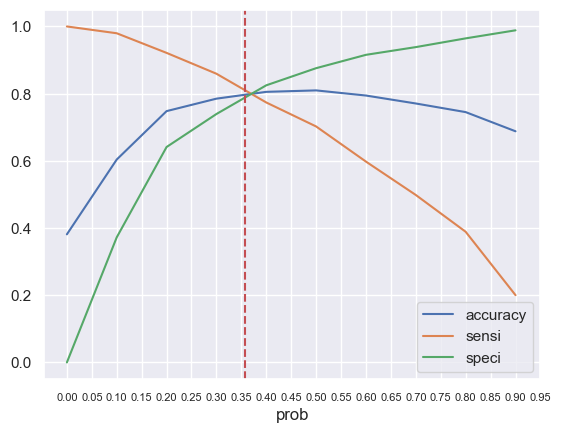

In [108]:
# Plotting accuracy, sensitivity and specificity for various probabilities:-


plt.figure(figsize=(20,5))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.358, color='r', linestyle='--') # additing axline

plt.show()

#### From the curve above, it seems that  0.35 is optimal cutoff point to take .

In [109]:
# Calculating 'final_predicted' based on 'Converted_Prob' using 0.35 cutoff point:-

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

In [110]:
# Dropping the unnecessary columns:-

y_train_pred_final = y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1) 

In [111]:
#Displaying the head:-

y_train_pred_final.head() 

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.608475         1871                1
1          0        0.105044         6795                0
2          0        0.349795         3516                0
3          0        0.851213         8105                1
4          0        0.303742         3934                0

### Assigning lead score to the leads based to prediction

In [112]:
# Assigning the 'Lead_Score' based on 'Converted_Prob' :-

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [113]:
# Selecting only important columns and displaying head of dataframe:-

y_train_pred_final[['Converted','Converted_Prob','Prospect ID','final_predicted','Lead_Score']].head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0        0.608475         1871                1          61
1          0        0.105044         6795                0          11
2          0        0.349795         3516                0          35
3          0        0.851213         8105                1          85
4          0        0.303742         3934                0          30

## Step 5 Model Evaluation And Prediction

### Confusion Matrix 

In [114]:
#Importing 'metrics' library:-

from sklearn import metrics

# Confusion matrix:-

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion)

[[3179  823]
 [ 478 1988]]


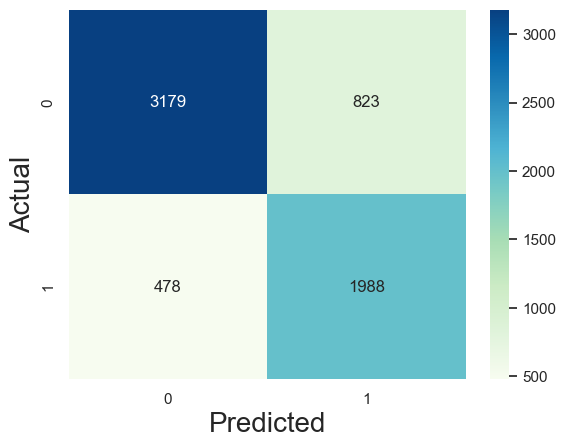

In [115]:
#Importing library to plot confusion matrix:-
# from sklearn.metrics import plot_confusion_matrix

# Plotting confusion matrix:-
sns.heatmap(confusion, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [ ]:
# Actual/Predicted     not_converted   converted
        # not_converted        3179          823
        # converted            478          1988 

In [116]:
# Check the overall accuracy:-

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7988559059987631

In [117]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [118]:
# Checking the sensitivity of our logistic regression model:-

TP / float(TP+FN)

0.8061638280616383

In [119]:
# Calculating specificity:-

TN / float(TN+FP)

0.7943528235882059

In [120]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert:-

print(FP/ float(TN+FP))

0.2056471764117941


In [121]:
# positive predictive value :-

print (TP / float(TP+FP))

0.7072216293134116


In [122]:
# Negative predictive value:-

print (TN / float(TN+ FN))

0.8692917692097347


## Precision and Recall

##### Precision
TP / TP + FP

In [123]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7072216293134116

##### Recall
TP / TP + FN

In [124]:
# Calculating 'Recall' :-

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8061638280616383

Using sklearn utilities for the same

In [125]:
#Importing 'precision_score' and 'recall_score':_

from sklearn.metrics import precision_score, recall_score

In [126]:
# Calculating Precision value:-

precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7072216293134116

In [127]:
#Calculating Recall value:-

recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8061638280616383

### Observation

We have the following values for the Train Data:

- Accuracy :    80%
- Sensitivity : 80%
- Specificity : 79%
- Pricision:    71%
- Recall:       81%

## Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [128]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [129]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

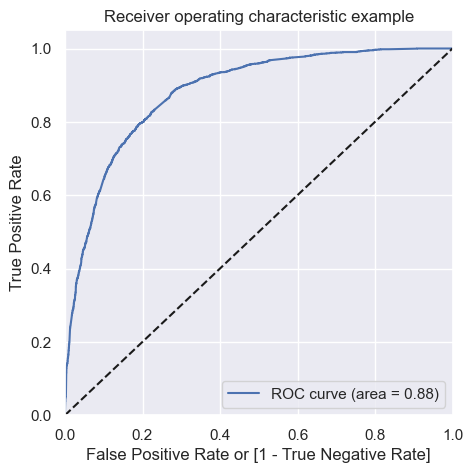

In [130]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Observation

We are getting a good value of 0.88 indicating a good predictive model.As ROC Curve should be a value close to 1. 

### Precision and recall tradeoff

In [131]:
# Importing required library for 'precision_recall_curve' :-

from sklearn.metrics import precision_recall_curve

In [132]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

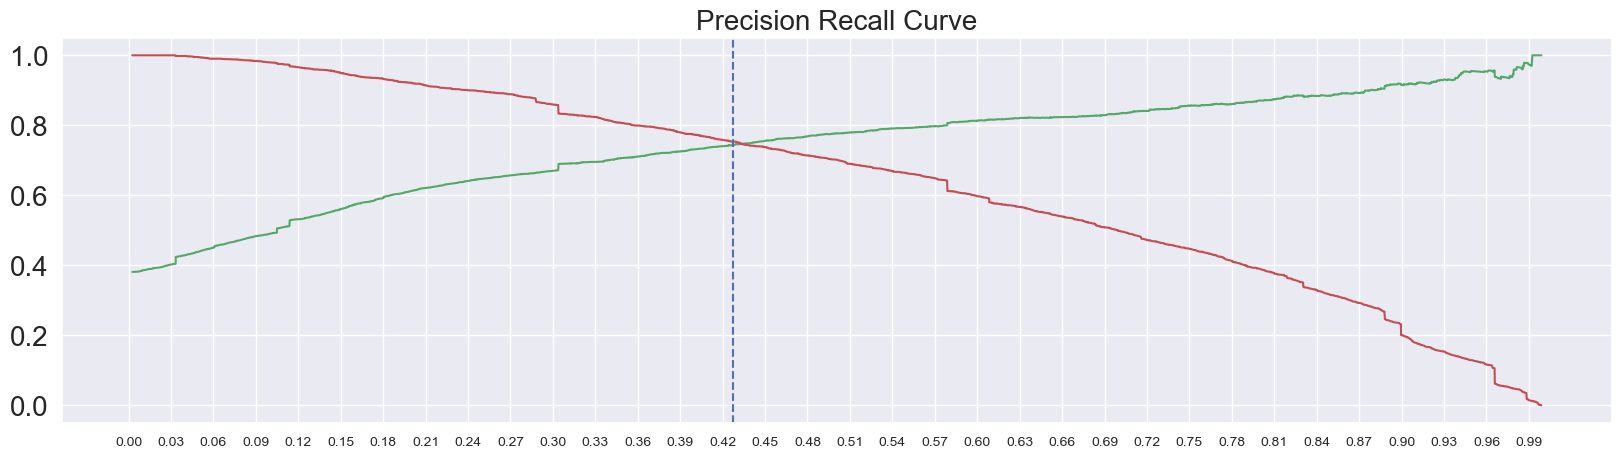

In [133]:
plt.figure(figsize=(20,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision Recall Curve',fontsize=20)
plt.axvline(x=0.427, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.03),size=10)
plt.yticks(size=20)
plt.show()

### Observation
From above above 'precision_recall_curve' we can see that cutoff point is 0.42.

### Now using this threshold value from 'Precision Recall Tradeoff Curve' for Data Evaluation

In [134]:
# plotting the Train dataset again with 0.427 as cutoff:-

y_train_pred_final['final_predicted_2'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head() # Displaying head 

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score  final_predicted_2
0          0        0.608475         1871                1          61                  1
1          0        0.105044         6795                0          11                  0
2          0        0.349795         3516                0          35                  0
3          0        0.851213         8105                1          85                  1
4          0        0.303742         3934                0          30                  0

In [135]:
# Confusion matrix:-

confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)
print(confusion_2)

[[3346  656]
 [ 596 1870]]


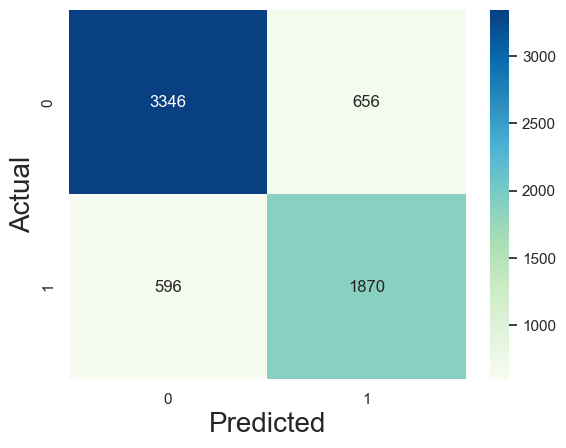

In [136]:
# Plotting confusion matrix:-
sns.heatmap(confusion_2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [145]:
# Check the overall accuracy:-

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)

0.8064316635745207

In [146]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [147]:
# Checking the sensitivity of our logistic regression model:-

TP / float(TP+FN)

0.7583130575831306

In [148]:
# Calculating specificity:-

TN / float(TN+FP)

0.8360819590204898

In [149]:
# positive predictive value :-

print (TP / float(TP+FP))

0.7403008709422011


In [150]:
# Negative predictive value:-

print (TN / float(TN+ FN))

0.8488077118214105


In [151]:
# Pricision:-

confusion_2[1,1]/(confusion_2[0,1]+confusion_2[1,1])

0.7403008709422011

In [152]:
# Calculating 'Recall' :-

confusion_2[1,1]/(confusion_2[1,0]+confusion_2[1,1])

0.7583130575831306

### Observation
By using the Precision - Recall trade off curve cut off point True Positive number has decrease and True Negative number has increase

Thus, we cannot use Precision-Recall trade-off method as it reduced True Positive so 'Recall'/'sensitivity' decreased for this point We have to increase Sensitivity Recall value to increase True Positives. Thus we will use 0.35 as optimal cutoff point.

## 5.2 Making predictions on the test set

#### Applying scaling on test data 

In [153]:
# Applying 'transform' to scale the 'test' data set:-

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [154]:
# Predicting using values used by the final model i.e. logm3:-

test_col = X_train_sm10.columns

X_test = X_test[test_col[1:]]

# Adding constant variable to test dataframe:-
X_test = sm.add_constant(X_test)

X_test.info() #Displaying info about columns

<class 'pandas.core.frame.DataFrame'>
Index: 2772 entries, 4269 to 2960
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   const                                  2772 non-null   float64
 1   Lead Origin_Landing Page Submission    2772 non-null   int32  
 2   Lead Origin_Lead Add Form              2772 non-null   int32  
 3   Lead Source_Olark Chat                 2772 non-null   int32  
 4   Lead Source_Welingak Website           2772 non-null   int32  
 5   Last Activity_Email Opened             2772 non-null   int32  
 6   Last Activity_Olark Chat Conversation  2772 non-null   int32  
 7   Last Activity_Others                   2772 non-null   int32  
 8   Last Activity_SMS Sent                 2772 non-null   int32  
 9   Last Activity_Unreachable              2772 non-null   int32  
 10  What is your current occupation_Other  2772 non-null   int32  
 11  Specia

#### Making Predictions on the X_test dataset using the final model

In [155]:
# Predicting on test data set using final model :-

y_test_pred = logm10.predict(X_test)

In [156]:
# Checking top 10 rows:-

y_test_pred[:10]

4269    0.493652
2376    0.887858
7766    0.385405
9199    0.104915
4359    0.899583
9186    0.627644
1631    0.541940
8963    0.195021
8007    0.044661
5324    0.408141
dtype: float64

In [157]:
# Converting y_test_pred to a dataframe :-

y_pred_1 = pd.DataFrame(y_test_pred)

In [158]:
# Let's see the head
y_pred_1.head()

0
4269  0.493652
2376  0.887858
7766  0.385405
9199  0.104915
4359  0.899583

In [159]:
# Converting y_test to dataframe:-

y_test_df = pd.DataFrame(y_test)

In [160]:
# Putting 'Prospect ID' to index:-

y_test_df['Prospect ID'] = y_test_df.index

In [161]:
# Removing index for both dataframes to append them side by side :-

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [162]:
# Appending y_test_df and y_pred_1:-

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [163]:
# Displaying head of 'y_pred_final' :-

y_pred_final.head()

Converted  Prospect ID         0
0          1         4269  0.493652
1          1         2376  0.887858
2          1         7766  0.385405
3          0         9199  0.104915
4          1         4359  0.899583

In [164]:
# Renaming the column '0' as 'Converted_Prob':-

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [165]:
# Rearranging the columns:-

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Prob']]

In [166]:
# Let's see the head of y_pred_final:-

y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4269          1        0.493652
1         2376          1        0.887858
2         7766          1        0.385405
3         9199          0        0.104915
4         4359          1        0.899583

#### Lead Score Assignment to leads

In [167]:
#Assigning 'Lead Score' to dataframe 'y_pred_final':-

y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [168]:
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  Lead_Score
0         4269          1        0.493652          49
1         2376          1        0.887858          89
2         7766          1        0.385405          39
3         9199          0        0.104915          10
4         4359          1        0.899583          90

#### Using Cutoff point of 0.35 from Sentivity - Specificity - Accuracy plot cut-off point

In [169]:
# Calculating 'final_Predicted' based on 'Converted_Prob' for cutoff point 0.357:-

y_pred_final['final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [170]:
# Displaying the head of 'y_pred_final' dataframe:-

y_pred_final.head()

Prospect ID  Converted  Converted_Prob  Lead_Score  final_Predicted
0         4269          1        0.493652          49                1
1         2376          1        0.887858          89                1
2         7766          1        0.385405          39                1
3         9199          0        0.104915          10                0
4         4359          1        0.899583          90                1

### 5.3 Test model evaluation

In [171]:
# Checking the overall accuracy:-

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8001443001443002

#### Confusion Matrix

In [172]:
# Calculating confusion matrix for test data:-

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1329,  348],
       [ 206,  889]], dtype=int64)

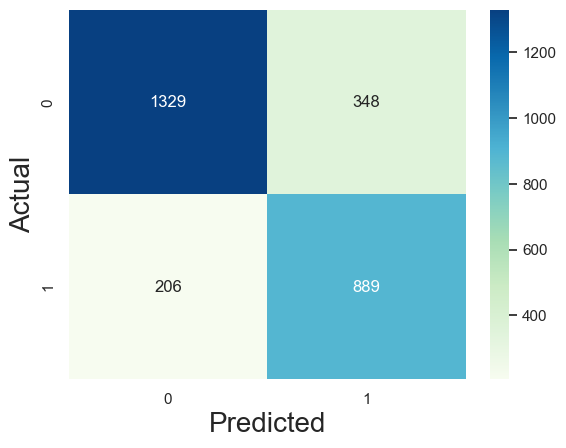

In [163]:
# Plotting confusion matrix:-
sns.heatmap(confusion2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [173]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [174]:
# Let's see the sensitivity of our logistic regression model:-

TP / float(TP+FN)

0.8118721461187215

In [175]:
# Let us calculate specificity:-

TN / float(TN+FP)

0.7924865831842576

In [176]:
# Calculate False Postive Rate 

print(FP/ float(TN+FP))

0.2075134168157424


In [177]:
# positive predictive value :-

print (TP / float(TP+FP))

0.7186742118027486


In [178]:
# Negative predictive value:-

print (TN / float(TN+ FN))

0.8657980456026059


### Precision and Recall

In [179]:
# Calculating 'precision_score':-

precision_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7186742118027486

In [180]:
#Calculating 'recall_score':-

recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8118721461187215

### Observation

The sensitivity value for test data is 81% while for train data is also 80% . The accuracy values is ~ 80%. Which shows that model is performing well for test data set also.

### Determining top feature based on final model (logm10)

In [181]:
# Displaying parameters obtained by final model 'logm5':-

pd.options.display.float_format = '{:.2f}'.format # Setting format option
logm10.params[1:]

Lead Origin_Landing Page Submission     -1.16
Lead Origin_Lead Add Form                2.87
Lead Source_Olark Chat                   1.12
Lead Source_Welingak Website             2.36
Last Activity_Email Opened               0.68
Last Activity_Olark Chat Conversation   -0.63
Last Activity_Others                     1.90
Last Activity_SMS Sent                   1.83
Last Activity_Unreachable                0.78
What is your current occupation_Other   -1.22
Specialization_Hospitality Management   -0.92
Specialization_International Business   -0.49
Specialization_Other                    -1.27
Do Not Email                            -1.30
Total Time Spent on Website              1.08
dtype: float64

In [182]:
logm10.params

const                                   -0.40
Lead Origin_Landing Page Submission     -1.16
Lead Origin_Lead Add Form                2.87
Lead Source_Olark Chat                   1.12
Lead Source_Welingak Website             2.36
Last Activity_Email Opened               0.68
Last Activity_Olark Chat Conversation   -0.63
Last Activity_Others                     1.90
Last Activity_SMS Sent                   1.83
Last Activity_Unreachable                0.78
What is your current occupation_Other   -1.22
Specialization_Hospitality Management   -0.92
Specialization_International Business   -0.49
Specialization_Other                    -1.27
Do Not Email                            -1.30
Total Time Spent on Website              1.08
dtype: float64

### Final model line equation :-

<b>Converted = -0.40 - 1.16 X Lead Origin_Landing Page Submission  + 2.87 X Lead Origin_Lead Add Form  + 1.12 X Lead Source_Olark Chat + 2.36 X Lead Source_Welingak Website + 0.68 X Last Activity_Email Opened  - 0.63 X Last Activity_Olark Chat Conversation + 1.90 X Last Activity_Others + 1.83 X Last Activity_SMS Sent + 0.78 X Last Activity_Unreachable - 1.22 X  What is your current occupation_Other - 0.92 X Specialization_Hospitality Management - 0.49 X Specialization_International Business - 1.27 X Specialization_Other - 1.30 X Do Not Email + 1.08 X Total Time Spent on Website</b>

In [183]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient:-

top_feature = logm3.params[1:] #This need to delete
top_feature = logm10.params[1:]
top_feature = 100.0 * (top_feature / top_feature.max())
top_feature

Lead Origin_Landing Page Submission     -40.34
Lead Origin_Lead Add Form               100.00
Lead Source_Olark Chat                   38.96
Lead Source_Welingak Website             82.30
Last Activity_Email Opened               23.85
Last Activity_Olark Chat Conversation   -21.94
Last Activity_Others                     66.24
Last Activity_SMS Sent                   63.82
Last Activity_Unreachable                27.12
What is your current occupation_Other   -42.64
Specialization_Hospitality Management   -32.21
Specialization_International Business   -17.06
Specialization_Other                    -44.27
Do Not Email                            -45.25
Total Time Spent on Website              37.66
dtype: float64

### Final Observation

Evaluation Metrics for the train Dataset:-
- Accuracy :0.80
- Sensitivity:~0.80
- Specificity:0.79
- Precision: 0.71
- Recall:    0.81

Evaluation Metrics for the test Dataset:-
- Accuracy : 0.80
- Sensitivity: ~ 0.81
- Specificity: 0.79
- Precision: 0.71
- Recall: 0.81

## Recommendation

To improve the potential lead conversion rate X-Education will have to mainly focus important features responsible for good conversion rate are :-
  
- <b>Lead Source_Welingak Website</b> : From graph as well final model shows that conversion rate is higher for those leads who got to know about course from 'Welingak Website',so company can focus on this website to get more number of potential leads.
  
- <b>Lead Origin_Lead Add Form </b>: Similarly from graph and final model shows that Leads who have engaged through 'Lead Add Form' having higher conversion rate so company can focus on it to get more number of leads cause  have a higher chances of getting converted.
  
 
- <b>Last Activity_SMS Sent</b>: Lead whose last activity is sms sent can be potential lead for company.
 

- <b>Total Time Spent on website </b>: Leads spending more time on website can be our potential lead.